## Install Libraries

In [40]:
#!pip3 install -r requirements.txt

In [ ]:
# Generate requirements_current.txt
# ! pip list --format=freeze > requirements_current.txt

# Import Libraries

In [1]:
import importlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
import models
import parameters
import preprocessing

In [85]:
importlib.reload(models)
importlib.reload(parameters)
# importlib.reload(preprocessing)

<module 'parameters' from 'c:\\Users\\Loo Guan Yee\\OneDrive - National University of Singapore\\NUS\\2023 2024 Sem 2\\DSA4263\\DSA4263-Project\\parameters.py'>

# Import Dataset

In [4]:
df = pd.read_csv("Data/Raw/insurance_claims.csv")

# EDA Insight

# Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
X_train_non_normalized, X_test_non_normalized, y_train_non_normalized, y_test_non_normalized = preprocessing.preprocess_pipeline(df, encoding=True, normalization=False)
X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = preprocessing.preprocess_pipeline(df, encoding=True, normalization=True)

In [8]:
rf_model = models.IndividualModel(
    model_func = RandomForestClassifier,
    param_info = parameters.RANDOM_FOREST_INFORMATION,
    X_train = X_train_non_normalized,
    X_test = X_test_non_normalized,
    y_train = y_train_non_normalized,
    y_test = y_test_non_normalized
    )

## Results without Tuning

In [9]:
rf_model.train(baseline=True)
rf_model.predict(baseline=True)

In [10]:
# No Tuning is already decent, with bad recall though
rf_model.evaluate()

{'accuracy': 0.815,
 'precision': 0.6363636363636364,
 'recall': 0.5714285714285714,
 'f1_score': 0.6021505376344085}

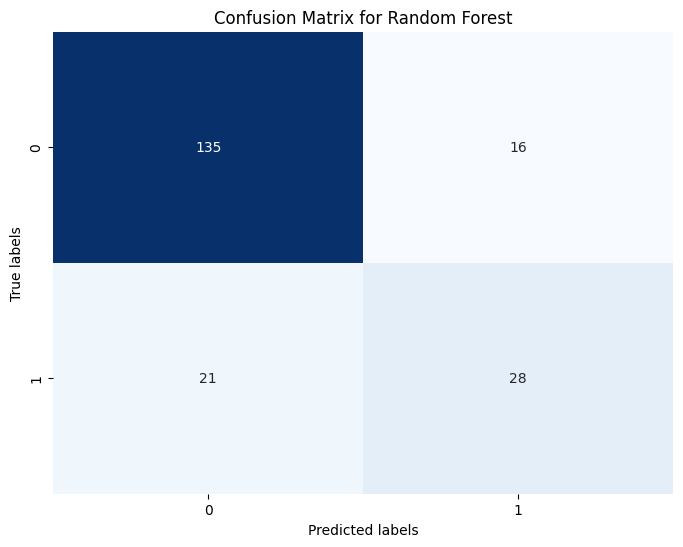

In [11]:
cm_rf_base = rf_model.plot_confusion_matrix()

PermutationExplainer explainer: 201it [00:22,  5.22it/s]                         


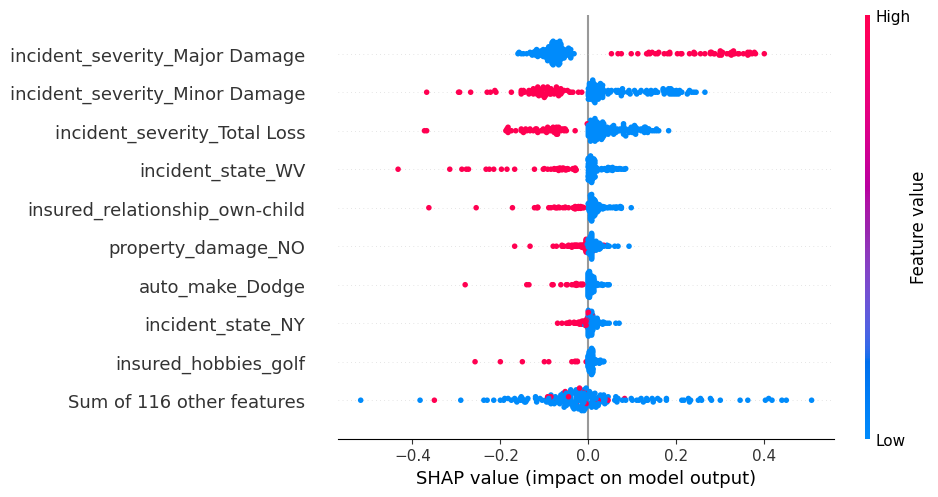

In [12]:
rf_model.shap_explanation(baseline=True)

(200,)


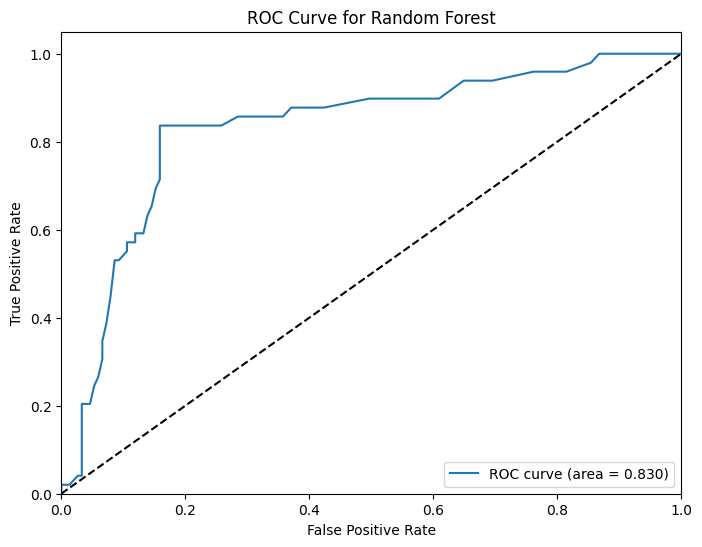

In [13]:
rf_model_baseline = rf_model.plot_auc(baseline=True)

## Results with Tuning

In [14]:
rf_model.finetune()

[I 2024-04-12 19:29:57,179] A new study created in memory with name: no-name-64621373-efe6-4129-bd4a-7eb5c087124d
[I 2024-04-12 19:30:00,666] Trial 0 finished with value: 0.6127707049914355 and parameters: {'n_estimators': 400, 'max_depth': 1, 'criterion': 'gini', 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.6127707049914355.
[I 2024-04-12 19:30:03,690] Trial 1 finished with value: 0.6289287534754257 and parameters: {'n_estimators': 100, 'max_depth': 1, 'criterion': 'entropy', 'min_samples_split': 7, 'min_samples_leaf': 8, 'max_features': None, 'bootstrap': True}. Best is trial 1 with value: 0.6289287534754257.
[I 2024-04-12 19:30:09,905] Trial 2 finished with value: 0.7089916291420326 and parameters: {'n_estimators': 450, 'max_depth': 2, 'criterion': 'gini', 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': None, 'bootstrap': True}. Best is trial 2 with value: 0.7089916291420326.
[I 2024-04-12 1

(0.751525177331629,
 {'n_estimators': 200,
  'max_depth': 3,
  'criterion': 'gini',
  'min_samples_split': 2,
  'min_samples_leaf': 9,
  'max_features': None,
  'bootstrap': True})

In [15]:
rf_model.train()
rf_model.predict()

rf_model.evaluate()

{'accuracy': 0.84,
 'precision': 0.6307692307692307,
 'recall': 0.8367346938775511,
 'f1_score': 0.7192982456140352}

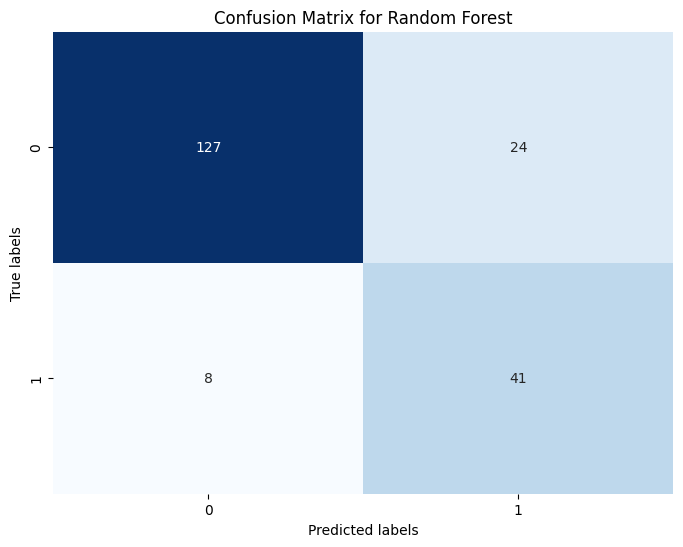

In [16]:
cm_rf_tuned = rf_model.plot_confusion_matrix()

## Model Explanation

PermutationExplainer explainer: 201it [00:20,  5.01it/s]                         


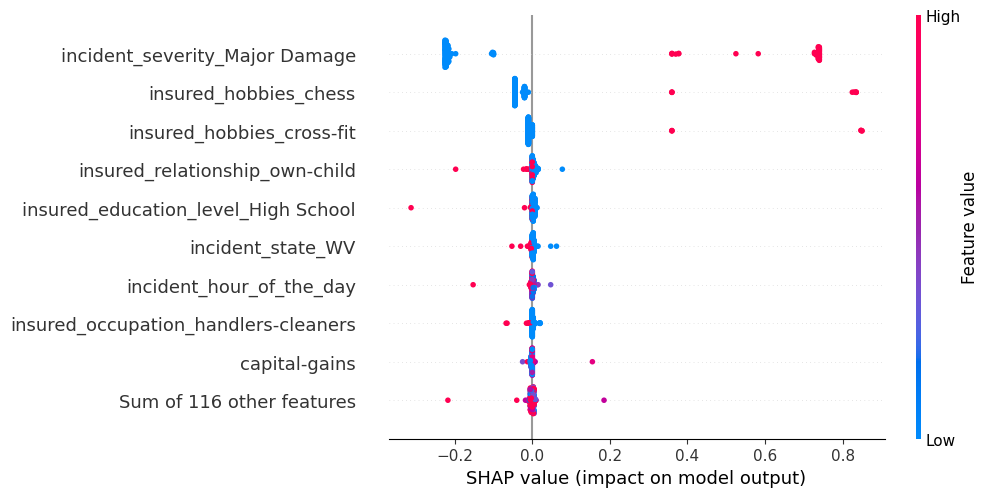

In [17]:
rf_model.shap_explanation()

(200,)


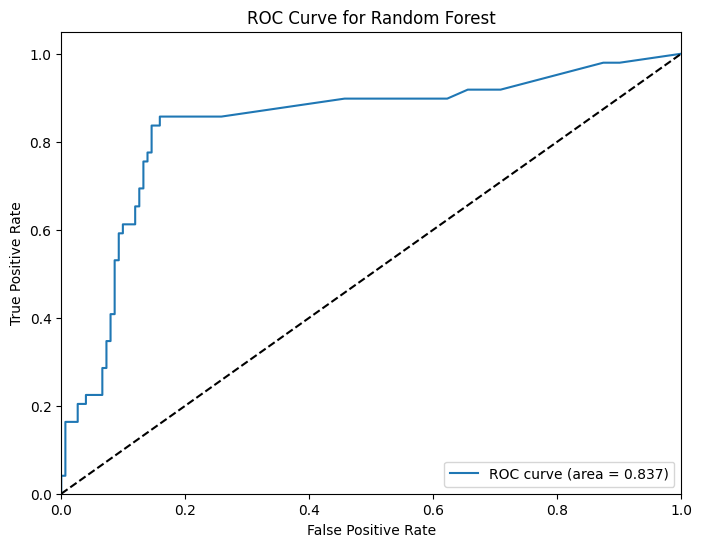

In [18]:
rf_model_smotenc = rf_model.plot_auc(baseline=False)

### Random Oversampling

In [19]:
rf_model.finetune(oversampling_strategy = "RandomOverSampler")

[I 2024-04-12 19:40:00,042] A new study created in memory with name: no-name-18d4a700-d71f-40cb-80ae-6117440b364f


Model has already been finetuned. Existing hyperparameters will discarded.


[I 2024-04-12 19:40:00,907] Trial 0 finished with value: 0.703604415083406 and parameters: {'n_estimators': 250, 'max_depth': 2, 'criterion': 'log_loss', 'min_samples_split': 6, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.703604415083406.
[I 2024-04-12 19:40:02,988] Trial 1 finished with value: 0.6781850327823934 and parameters: {'n_estimators': 400, 'max_depth': 10, 'criterion': 'entropy', 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.703604415083406.
[I 2024-04-12 19:40:04,347] Trial 2 finished with value: 0.6387484479259979 and parameters: {'n_estimators': 500, 'max_depth': 1, 'criterion': 'gini', 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.703604415083406.
[I 2024-04-12 19:40:04,926] Trial 3 finished with value: 0.6607191729731523 and parameters: {'n_estimators': 200, 'max_depth':

(0.7572837598343976,
 {'n_estimators': 500,
  'max_depth': 5,
  'criterion': 'gini',
  'min_samples_split': 7,
  'min_samples_leaf': 8,
  'max_features': None,
  'bootstrap': True})

In [20]:
rf_model.train_predict(oversampling_strategy = "RandomOverSampler")
rf_model.evaluate()

{'accuracy': 0.845,
 'precision': 0.6363636363636364,
 'recall': 0.8571428571428571,
 'f1_score': 0.7304347826086957}

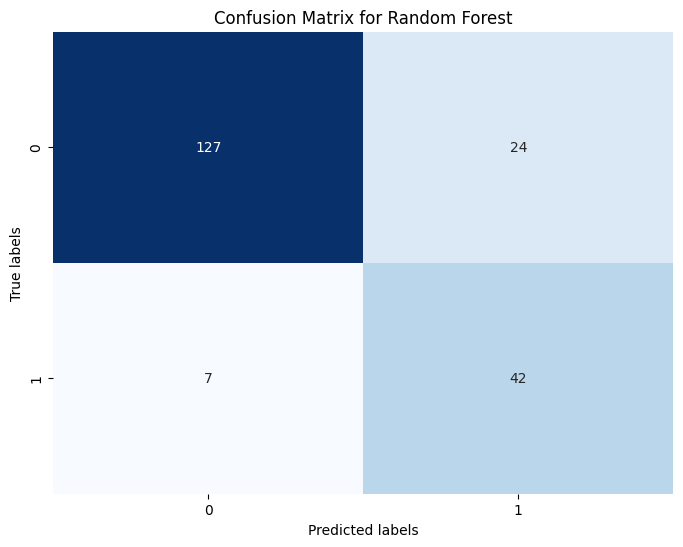

In [21]:
cm_rf_tuned = rf_model.plot_confusion_matrix()

PermutationExplainer explainer: 201it [00:56,  2.89it/s]                         


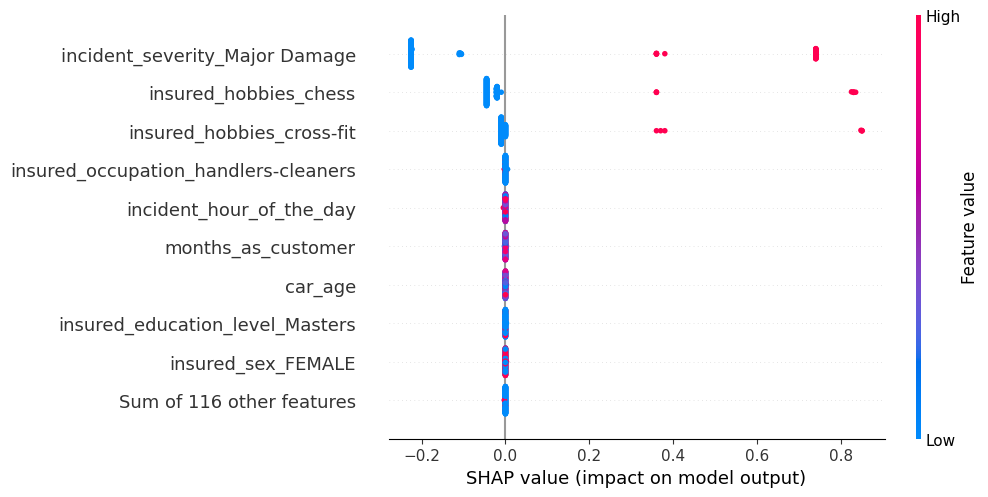

In [22]:
rf_model.shap_explanation()

(200,)


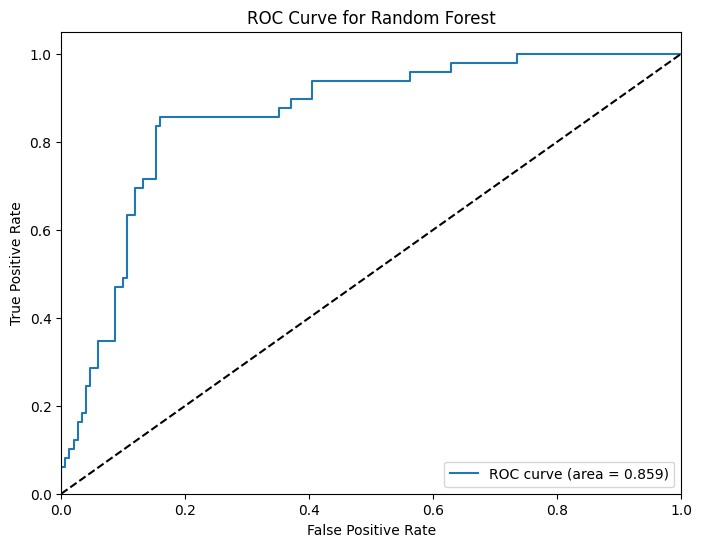

In [23]:
rf_model_random_oversampler = rf_model.plot_auc(baseline=False)

### ADASYN

In [24]:
rf_model.finetune(oversampling_strategy = "ADASYN")

[I 2024-04-12 19:51:50,728] A new study created in memory with name: no-name-d2c9a713-5639-474e-abe3-48157f834628


Model has already been finetuned. Existing hyperparameters will discarded.


[I 2024-04-12 19:51:51,180] Trial 0 finished with value: 0.6133092301474471 and parameters: {'n_estimators': 100, 'max_depth': 4, 'criterion': 'log_loss', 'min_samples_split': 4, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.6133092301474471.
[I 2024-04-12 19:51:53,249] Trial 1 finished with value: 0.47522029461459747 and parameters: {'n_estimators': 300, 'max_depth': 1, 'criterion': 'gini', 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': None, 'bootstrap': False}. Best is trial 0 with value: 0.6133092301474471.
[I 2024-04-12 19:51:54,291] Trial 2 finished with value: 0.5969025768576169 and parameters: {'n_estimators': 400, 'max_depth': 1, 'criterion': 'log_loss', 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.6133092301474471.
[I 2024-04-12 19:51:55,354] Trial 3 finished with value: 0.615470360392961 and parameters: {'n_estimators': 300, 'max_dep

(0.747551109895562,
 {'n_estimators': 400,
  'max_depth': 5,
  'criterion': 'gini',
  'min_samples_split': 9,
  'min_samples_leaf': 2,
  'max_features': None,
  'bootstrap': True})

In [25]:
rf_model.train_predict(oversampling_strategy = "ADASYN")
rf_model.evaluate()

{'accuracy': 0.845,
 'precision': 0.6363636363636364,
 'recall': 0.8571428571428571,
 'f1_score': 0.7304347826086957}

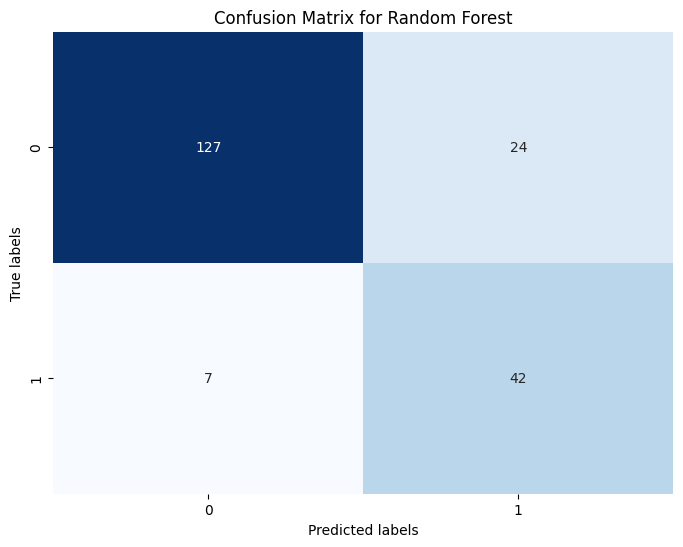

In [26]:
cm_rf_tuned = rf_model.plot_confusion_matrix()

PermutationExplainer explainer: 201it [00:46,  3.37it/s]                         


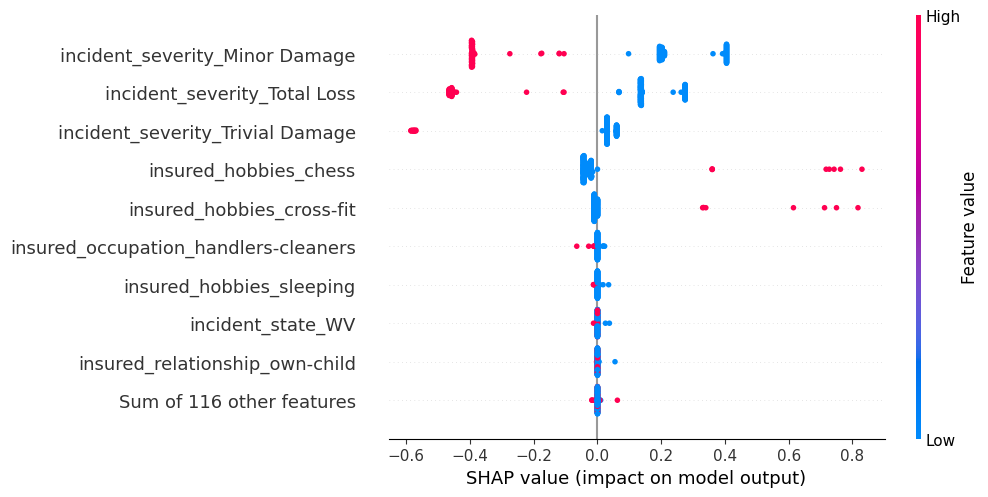

In [27]:
rf_model.shap_explanation()

(200,)


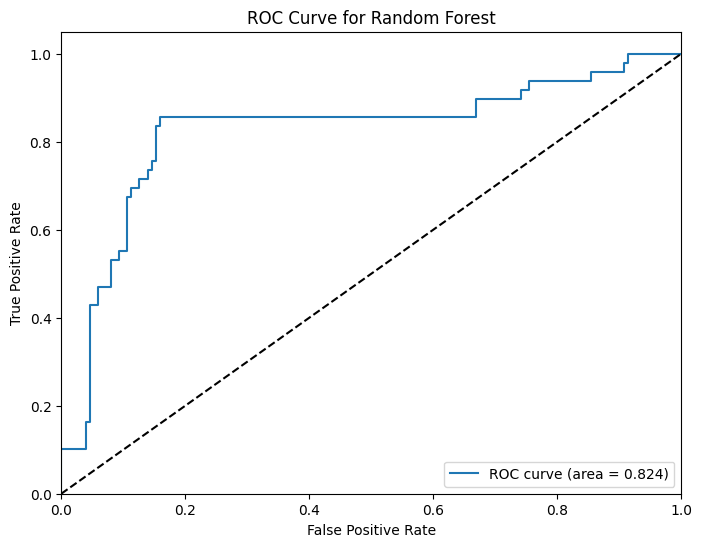

In [28]:
rf_model_random_adasyn = rf_model.plot_auc(baseline=False)

# Decision Tree

In [111]:
from sklearn.tree import DecisionTreeClassifier

# NOT ACTUAL PARAMS
tuned_params = {
    "max_depth": 10,
    "min_samples_split": 2,
    "min_samples_leaf": 2
}

In [112]:
X_train_non_normalized, X_test_non_normalized, y_train_non_normalized, y_test_non_normalized = preprocessing.preprocess_pipeline(df, encoding=True, normalization=False)
X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = preprocessing.preprocess_pipeline(df, encoding=True, normalization=True)

In [113]:
dt_model = models.IndividualModel(
    model_func = DecisionTreeClassifier,
    param_info = parameters.DECISION_TREE_INFORMATION,
    X_train = X_train_non_normalized,
    X_test = X_test_non_normalized,
    y_train = y_train_non_normalized,
    y_test = y_test_non_normalized
    )

## SMOTENC without Tuning (Baseline)

In [117]:
dt_model.train(baseline=True)
dt_model.predict(baseline=True)

In [118]:
# No Tuning is already decent, with bad recall though
dt_model.evaluate()

{'accuracy': 0.79,
 'precision': 0.5686274509803921,
 'recall': 0.5918367346938775,
 'f1_score': 0.58}

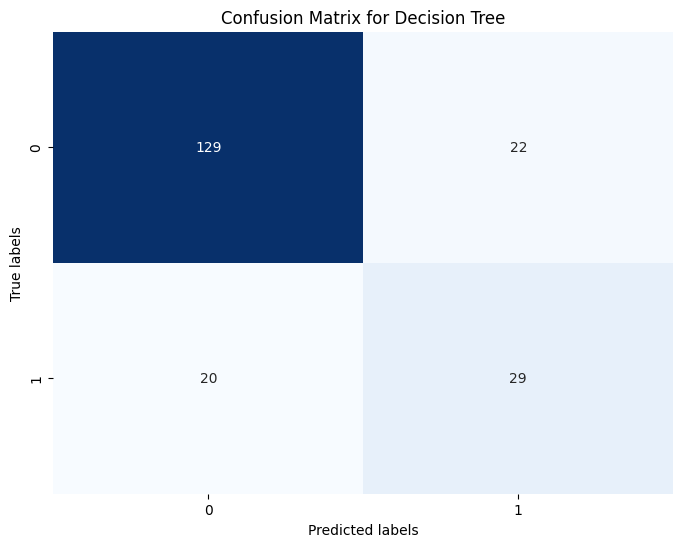

In [119]:
cm_dt_base = dt_model.plot_confusion_matrix()

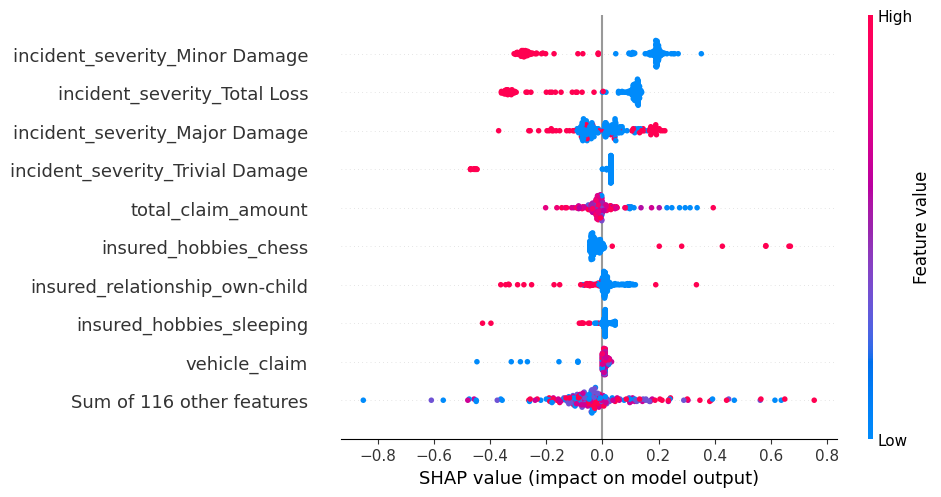

In [120]:
dt_model.shap_explanation(baseline=True)

(200,)


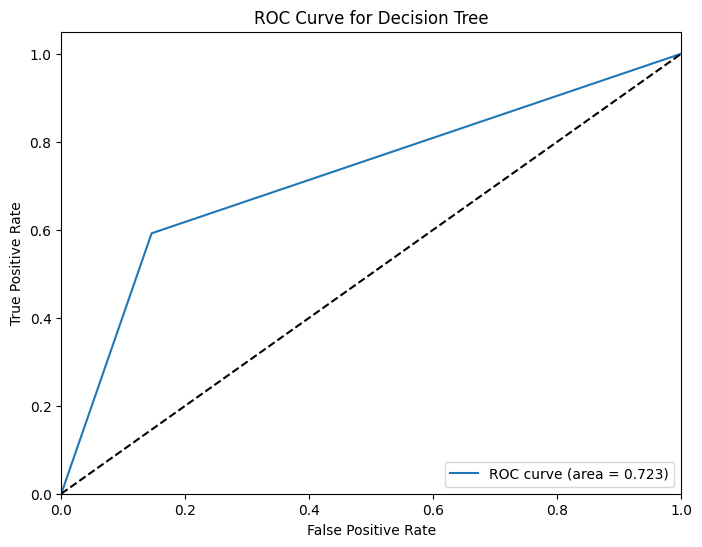

In [121]:
dt_model_random_baseline = dt_model.plot_auc(baseline=True)

## SMOTENC with Tuning

In [122]:
dt_model.finetune()

[I 2024-04-13 03:48:51,826] A new study created in memory with name: no-name-55c89f2f-b816-4477-915f-a5ab0b820beb
[I 2024-04-13 03:48:53,676] Trial 0 finished with value: 0.6435482816581549 and parameters: {'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.6435482816581549.
[I 2024-04-13 03:48:55,482] Trial 1 finished with value: 0.6288224072741396 and parameters: {'max_depth': 1, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.6435482816581549.
[I 2024-04-13 03:48:57,294] Trial 2 finished with value: 0.6288224072741396 and parameters: {'max_depth': 1, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.6435482816581549.
[I 2024-04-13 03:48:59,081] Trial 3 finished with value: 0.6488716411101407 and parameters: {'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 3 with value: 0.6488716411101407.
[I 2024-04-13 03:49:01,035] Trial 4 finished with value: 0.6288224

(0.6659290213363023,
 {'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 1})

In [123]:
dt_model.train()
dt_model.predict()

dt_model.evaluate()

{'accuracy': 0.835,
 'precision': 0.6290322580645161,
 'recall': 0.7959183673469388,
 'f1_score': 0.7027027027027026}

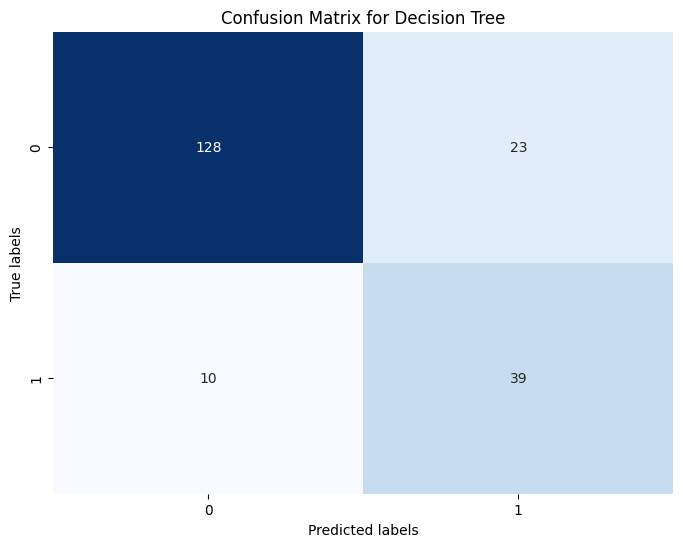

In [124]:
cm_dt_finetuned = dt_model.plot_confusion_matrix()

## Model Explanation

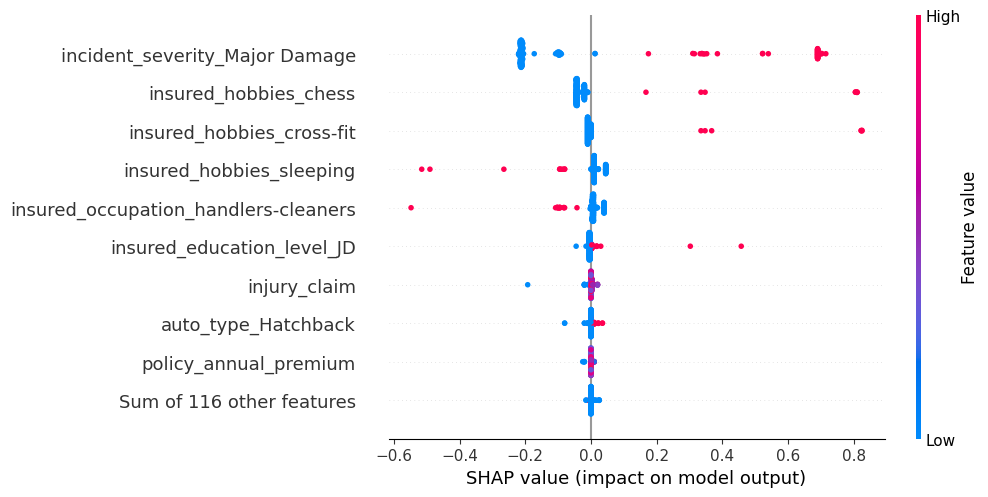

In [125]:
dt_model.shap_explanation()

(200,)


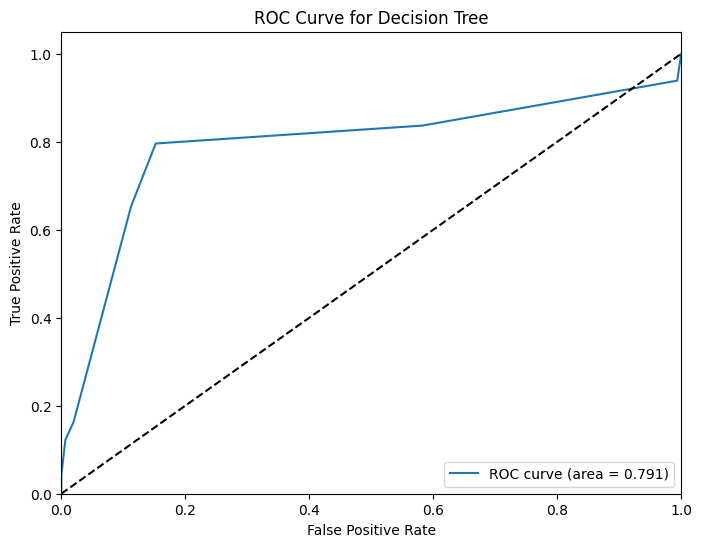

In [126]:
dt_model_random_smotenc = dt_model.plot_auc(baseline=False)

## Using Random Oversampling

In [127]:
dt_model.finetune(oversampling_strategy = 'RandomOverSampler')

[I 2024-04-13 03:52:43,974] A new study created in memory with name: no-name-d46b6f3a-8463-4e75-a3df-fe19a4c0ac15
[I 2024-04-13 03:52:44,045] Trial 0 finished with value: 0.6288224072741396 and parameters: {'max_depth': 1, 'min_samples_split': 9, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.6288224072741396.
[I 2024-04-13 03:52:44,115] Trial 1 finished with value: 0.6288224072741396 and parameters: {'max_depth': 1, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.6288224072741396.


Model has already been finetuned. Existing hyperparameters will discarded.


[I 2024-04-13 03:52:44,185] Trial 2 finished with value: 0.6288224072741396 and parameters: {'max_depth': 1, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.6288224072741396.
[I 2024-04-13 03:52:44,259] Trial 3 finished with value: 0.6971260336552764 and parameters: {'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 3 with value: 0.6971260336552764.
[I 2024-04-13 03:52:44,327] Trial 4 finished with value: 0.6288224072741396 and parameters: {'max_depth': 1, 'min_samples_split': 9, 'min_samples_leaf': 1}. Best is trial 3 with value: 0.6971260336552764.
[I 2024-04-13 03:52:44,408] Trial 5 finished with value: 0.6950097555663851 and parameters: {'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 3 with value: 0.6971260336552764.
[I 2024-04-13 03:52:44,478] Trial 6 finished with value: 0.6288224072741396 and parameters: {'max_depth': 1, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 3 with va

(0.7174639674639675,
 {'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 2})

In [128]:
dt_model.train_predict(oversampling_strategy = 'RandomOverSampler')
dt_model.evaluate()

{'accuracy': 0.83,
 'precision': 0.6190476190476191,
 'recall': 0.7959183673469388,
 'f1_score': 0.6964285714285715}

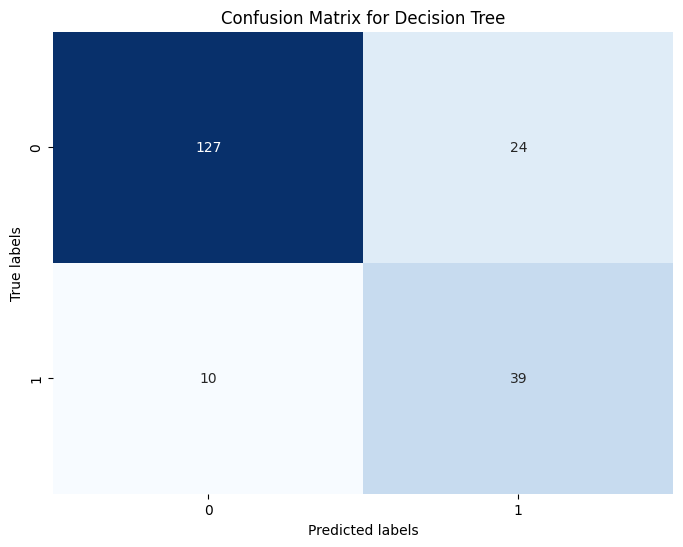

In [129]:
cm_dt = dt_model.plot_confusion_matrix()

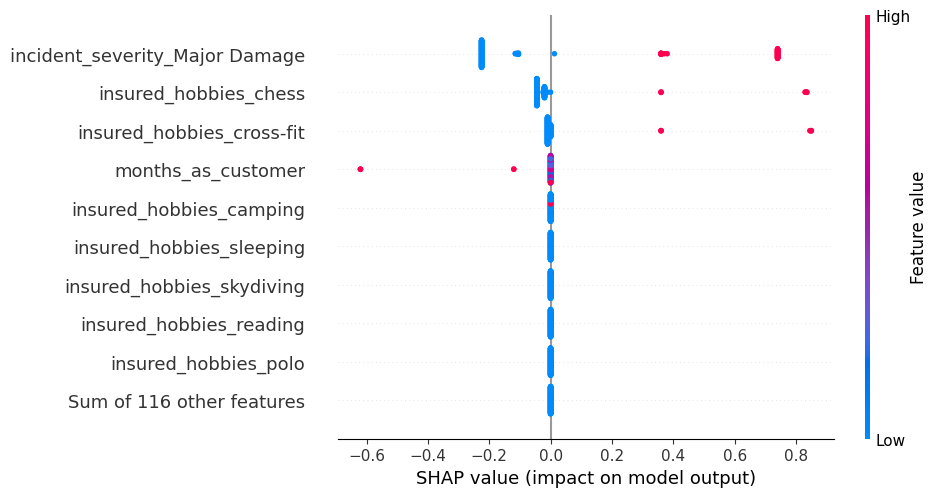

In [130]:
dt_model.shap_explanation()

(200,)


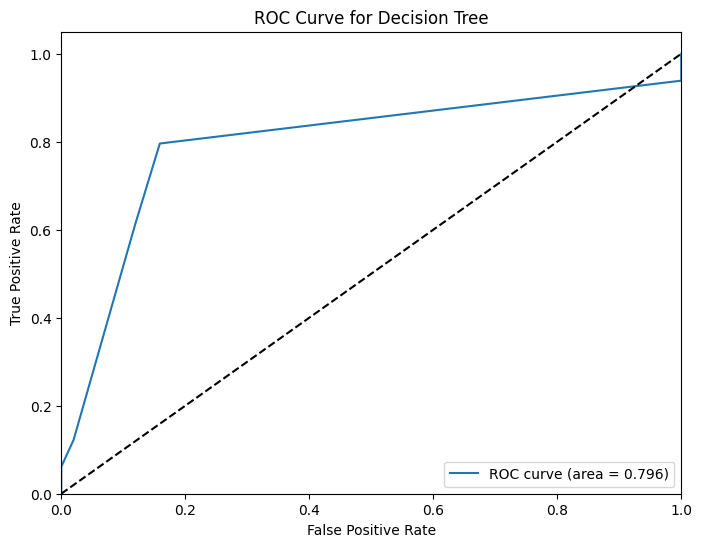

In [131]:
dt_model_random_random_oversampler = dt_model.plot_auc(baseline=False)

## Using ADASYN

In [132]:
dt_model.finetune(oversampling_strategy = 'ADASYN')

[I 2024-04-13 03:53:19,727] A new study created in memory with name: no-name-2d9a6666-b3f7-41c2-8d21-06f1d6bdf45e
[I 2024-04-13 03:53:19,859] Trial 0 finished with value: 0.6963948750615979 and parameters: {'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.6963948750615979.


Model has already been finetuned. Existing hyperparameters will discarded.


[I 2024-04-13 03:53:19,987] Trial 1 finished with value: 0.5742062325958889 and parameters: {'max_depth': 2, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.6963948750615979.
[I 2024-04-13 03:53:20,126] Trial 2 finished with value: 0.6222939357267716 and parameters: {'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.6963948750615979.
[I 2024-04-13 03:53:20,257] Trial 3 finished with value: 0.6963948750615979 and parameters: {'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.6963948750615979.
[I 2024-04-13 03:53:20,374] Trial 4 finished with value: 0.47438056523422373 and parameters: {'max_depth': 1, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.6963948750615979.
[I 2024-04-13 03:53:20,489] Trial 5 finished with value: 0.47438056523422373 and parameters: {'max_depth': 1, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 0 with

(0.7129569892473118,
 {'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 2})

In [133]:
dt_model.train_predict(oversampling_strategy = "ADASYN")
dt_model.evaluate()

{'accuracy': 0.84,
 'precision': 0.6307692307692307,
 'recall': 0.8367346938775511,
 'f1_score': 0.7192982456140352}

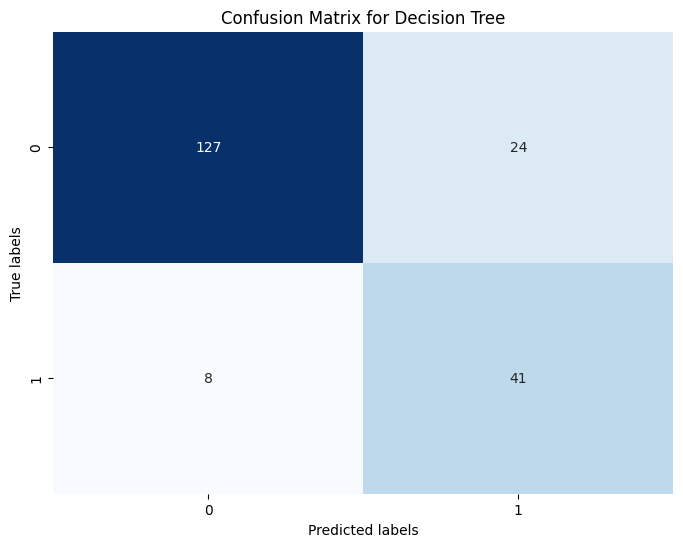

In [134]:
cm_dt = dt_model.plot_confusion_matrix()

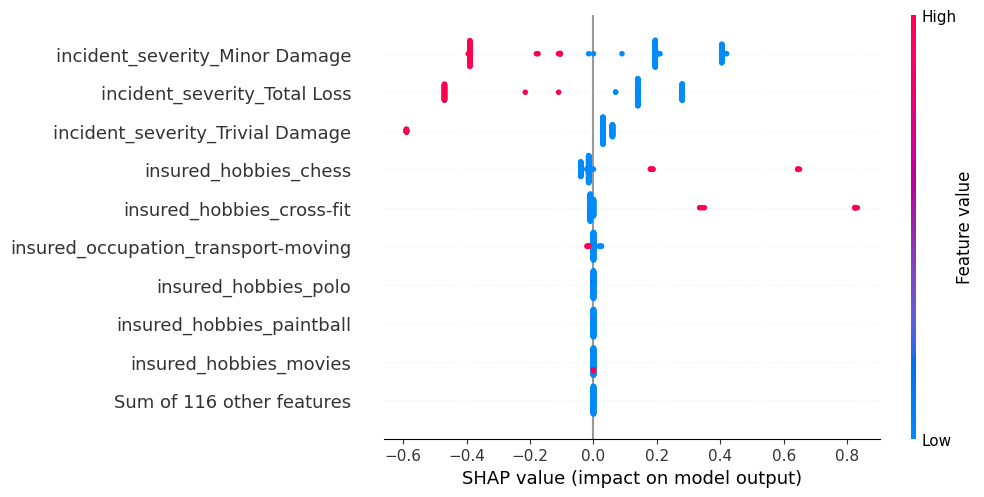

In [135]:
dt_model.shap_explanation()

(200,)


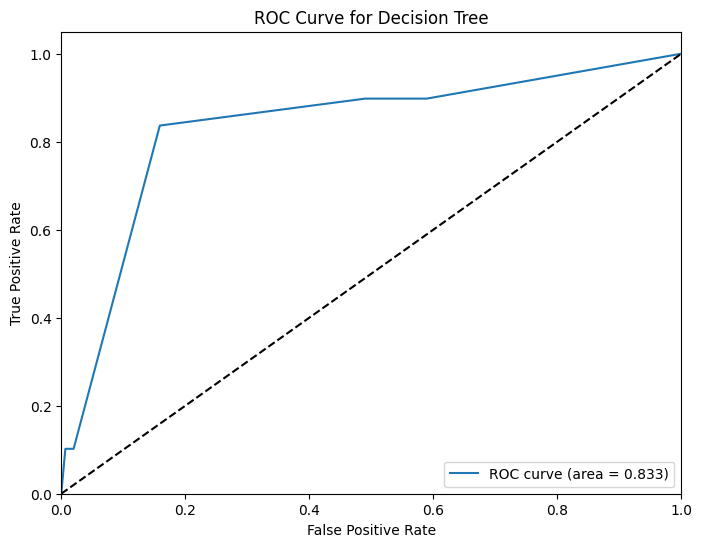

In [136]:
dt_model_random_random_adasyn = dt_model.plot_auc(baseline=False)

# XGBoost

## Dataset and Model Creation

In [32]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = preprocessing.preprocess_pipeline(
    df,
    encoding = True,
    normalization = False,
    )

In [33]:
rows_with_nan = X_train_xgb[X_train_xgb.isna().any(axis=1)]
rows_with_nan.shape

(0, 125)

In [34]:
X_train_xgb.dtypes

months_as_customer     int64
age                    int64
policy_state_OH        uint8
policy_state_IN        uint8
policy_state_IL        uint8
                       ...  
auto_type_Truck        uint8
auto_type_Sedan        uint8
auto_type_SUV          uint8
auto_type_Hatchback    uint8
auto_type_Coupe        uint8
Length: 125, dtype: object

## Model Creation

In [35]:
import xgboost as xgb

In [36]:
xgb_static_params = {
     "random_state": 42,
}

In [37]:
xgb_model = models.IndividualModel(
    model_func = xgb.XGBClassifier,
    param_info = parameters.XGB_INFORMATION,
    X_train = X_train_xgb,
    X_test = X_test_xgb,
    y_train = y_train_xgb,
    y_test = y_test_xgb,
    static_params = xgb_static_params
    )

## SMOTENC Results with no tuning

In [38]:
xgb_model.train_predict_eval(oversampling_strategy="SMOTENC", baseline=True)

{'accuracy': 0.82,
 'precision': 0.6511627906976745,
 'recall': 0.5714285714285714,
 'f1_score': 0.6086956521739131}

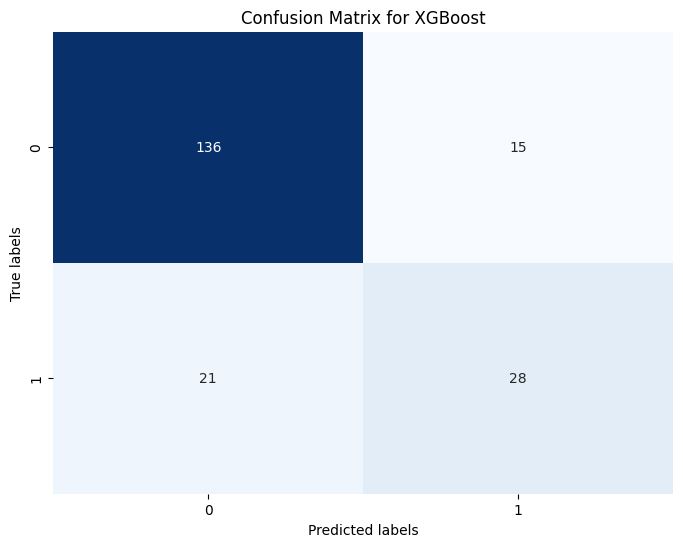

In [39]:
cm_xgb_base = xgb_model.plot_confusion_matrix()

(200,)


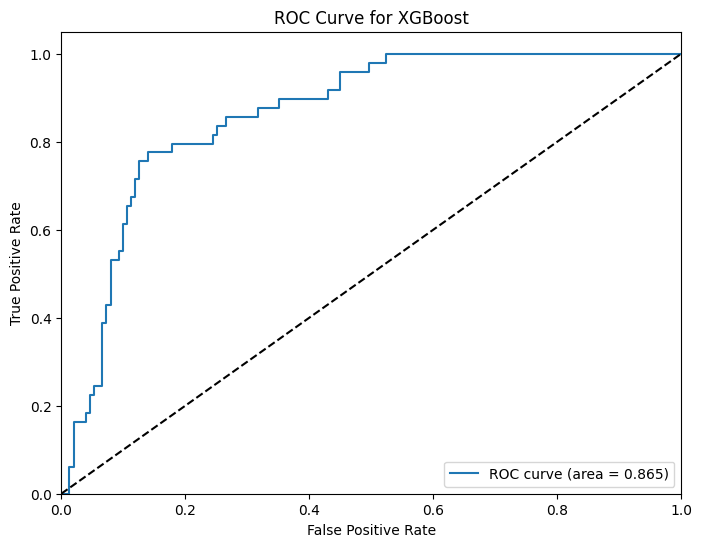

In [43]:
auc_xgb_base = xgb_model.plot_auc(baseline=True)

###  Model Explanation

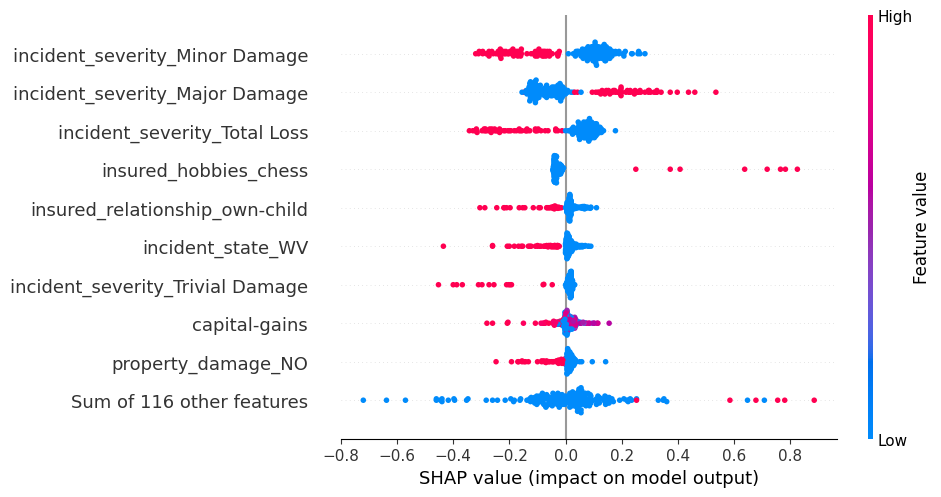

In [44]:
xgb_model.shap_explanation(baseline=True)

<Axes: title={'center': 'Untuned XGBoost Feature Importance (SMOTENC)'}, xlabel='F score', ylabel='Features'>

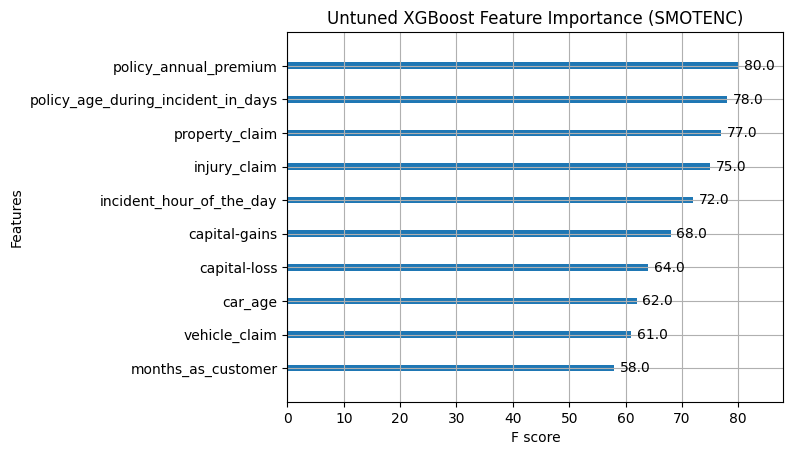

In [45]:
xgb.plot_importance(xgb_model.baseline_model, title="Untuned XGBoost Feature Importance (SMOTENC)", max_num_features=10)

## SMOTENC Results with Tuning

In [46]:
xgb_model.finetune(oversampling_strategy="SMOTENC")

[I 2024-04-12 17:35:14,833] A new study created in memory with name: no-name-085906f3-b5f4-4be7-9c78-25bab25bfee6
[I 2024-04-12 17:35:17,496] Trial 0 finished with value: 0.5891337075472097 and parameters: {'n_estimators': 18, 'max_depth': 12, 'learning_rate': 0.45, 'subsample': 0.6000000000000001, 'colsample_bytree': 0.4, 'gamma': 1.8, 'reg_alpha': 0.30000000000000004, 'reg_lambda': 5.0}. Best is trial 0 with value: 0.5891337075472097.
[I 2024-04-12 17:35:20,670] Trial 1 finished with value: 0.6339846051804594 and parameters: {'n_estimators': 335, 'max_depth': 30, 'learning_rate': 0.47000000000000003, 'subsample': 0.5, 'colsample_bytree': 0.35000000000000003, 'gamma': 5.0, 'reg_alpha': 1.5, 'reg_lambda': 3.8000000000000003}. Best is trial 1 with value: 0.6339846051804594.
[I 2024-04-12 17:35:23,718] Trial 2 finished with value: 0.6153051147009936 and parameters: {'n_estimators': 71, 'max_depth': 25, 'learning_rate': 0.17, 'subsample': 0.35000000000000003, 'colsample_bytree': 0.9000000

(0.7636904789528244,
 {'n_estimators': 33,
  'max_depth': 15,
  'learning_rate': 0.060000000000000005,
  'subsample': 0.8500000000000001,
  'colsample_bytree': 0.95,
  'gamma': 0.7000000000000001,
  'reg_alpha': 3.3000000000000003,
  'reg_lambda': 1.7000000000000002})

In [47]:
xgb_model.train_predict_eval(oversampling_strategy="SMOTENC", baseline=False)

{'accuracy': 0.855,
 'precision': 0.65625,
 'recall': 0.8571428571428571,
 'f1_score': 0.743362831858407}

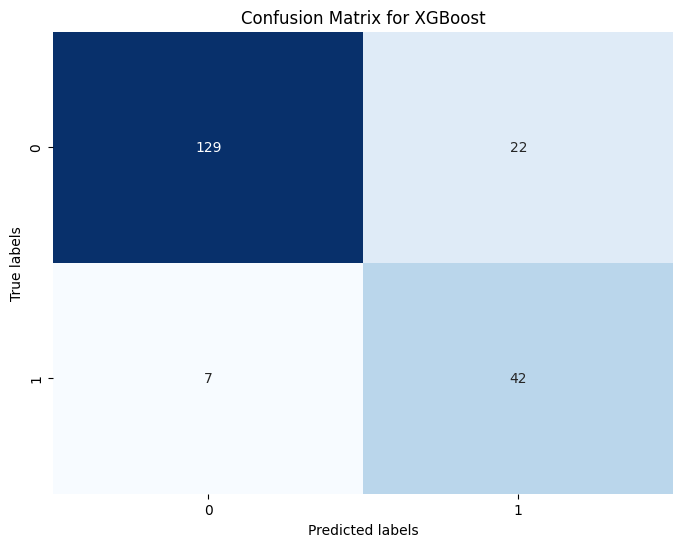

In [48]:
cm_xgb_tuned = xgb_model.plot_confusion_matrix()

(200,)


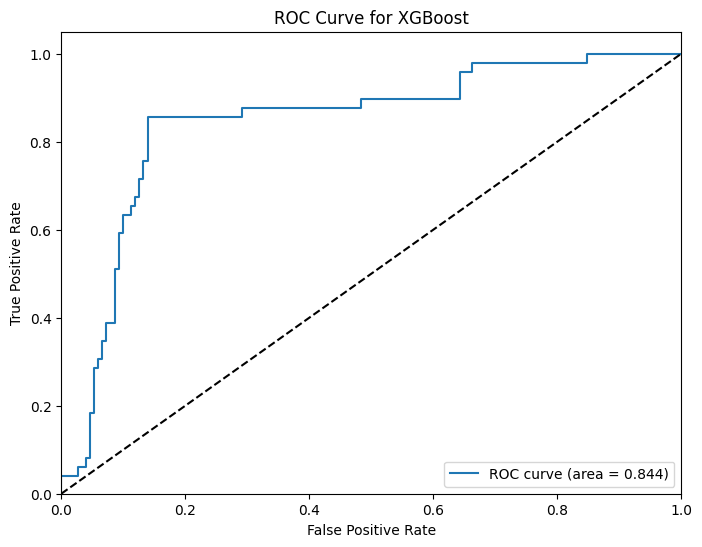

In [49]:
auc_xgb_smotenc = xgb_model.plot_auc(baseline=False)

### Tuned Model Explanation

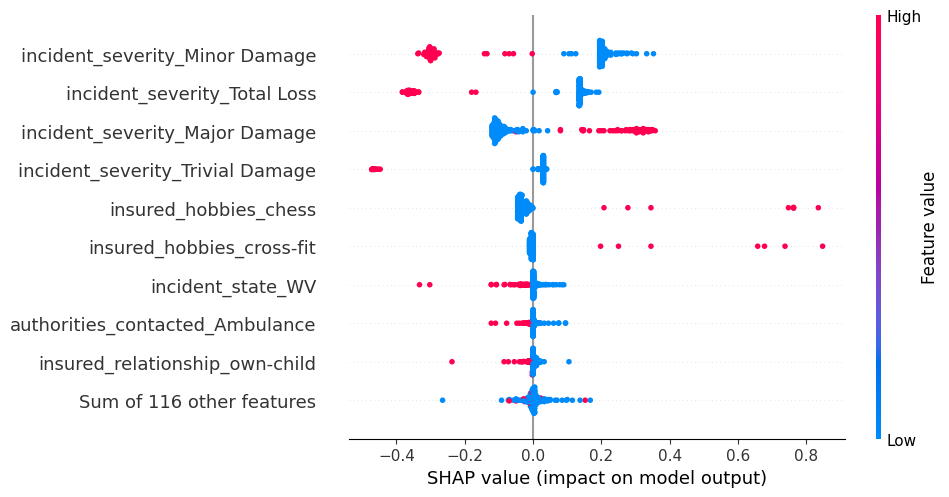

In [50]:
xgb_model.shap_explanation(baseline=False)

<Axes: title={'center': 'Tuned XGBoost Feature Importance (SMOTENC)'}, xlabel='F score', ylabel='Features'>

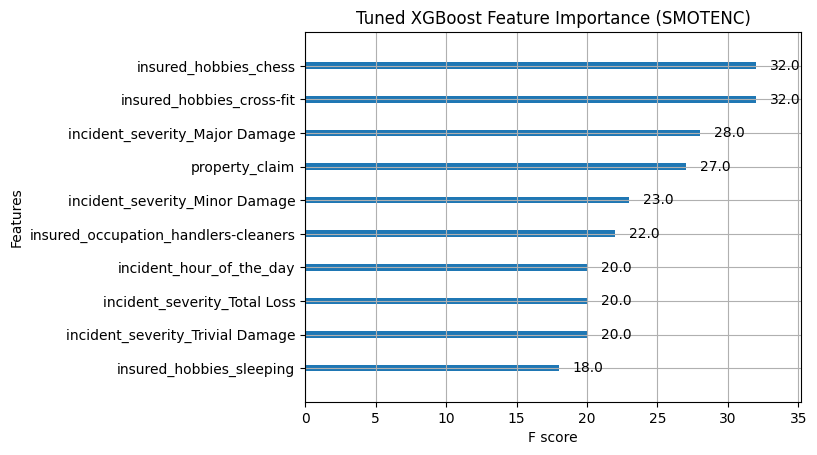

In [51]:
xgb.plot_importance(xgb_model.tuned_model, title="Tuned XGBoost Feature Importance (SMOTENC)", max_num_features=10)

## ADASYN Results with Tuning

In [52]:
xgb_model.finetune(oversampling_strategy="ADASYN")

[I 2024-04-12 17:40:21,746] A new study created in memory with name: no-name-372dec06-c980-40a9-9f7b-eda13baf9942


Model has already been finetuned. Existing hyperparameters will discarded.


[I 2024-04-12 17:40:22,080] Trial 0 finished with value: 0.6871849973836547 and parameters: {'n_estimators': 18, 'max_depth': 9, 'learning_rate': 0.35000000000000003, 'subsample': 1.0, 'colsample_bytree': 0.5, 'gamma': 4.2, 'reg_alpha': 0.7000000000000001, 'reg_lambda': 3.1}. Best is trial 0 with value: 0.6871849973836547.
[I 2024-04-12 17:40:23,953] Trial 1 finished with value: 0.5111153930427467 and parameters: {'n_estimators': 393, 'max_depth': 33, 'learning_rate': 0.17, 'subsample': 0.30000000000000004, 'colsample_bytree': 0.7, 'gamma': 0.5, 'reg_alpha': 3.4000000000000004, 'reg_lambda': 0.5}. Best is trial 0 with value: 0.6871849973836547.
[I 2024-04-12 17:40:25,139] Trial 2 finished with value: 0.6016022227240893 and parameters: {'n_estimators': 314, 'max_depth': 7, 'learning_rate': 0.5, 'subsample': 0.65, 'colsample_bytree': 0.35000000000000003, 'gamma': 2.9000000000000004, 'reg_alpha': 2.8000000000000003, 'reg_lambda': 3.9000000000000004}. Best is trial 0 with value: 0.68718499

(0.7284819831331459,
 {'n_estimators': 40,
  'max_depth': 35,
  'learning_rate': 0.01,
  'subsample': 0.8,
  'colsample_bytree': 1.0,
  'gamma': 2.6,
  'reg_alpha': 0.4,
  'reg_lambda': 3.8000000000000003})

In [53]:
xgb_model.train_predict(oversampling_strategy="ADASYN")

xgb_model.evaluate()

{'accuracy': 0.835,
 'precision': 0.6290322580645161,
 'recall': 0.7959183673469388,
 'f1_score': 0.7027027027027026}

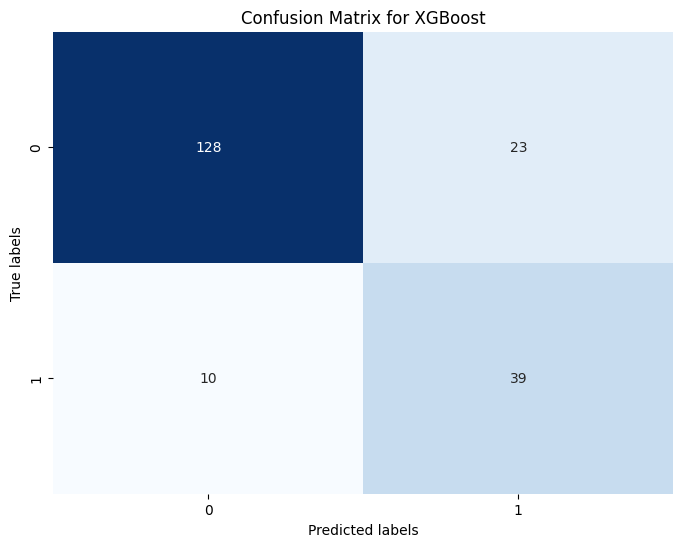

In [54]:
cm_xgb_tuned = xgb_model.plot_confusion_matrix()

(200,)


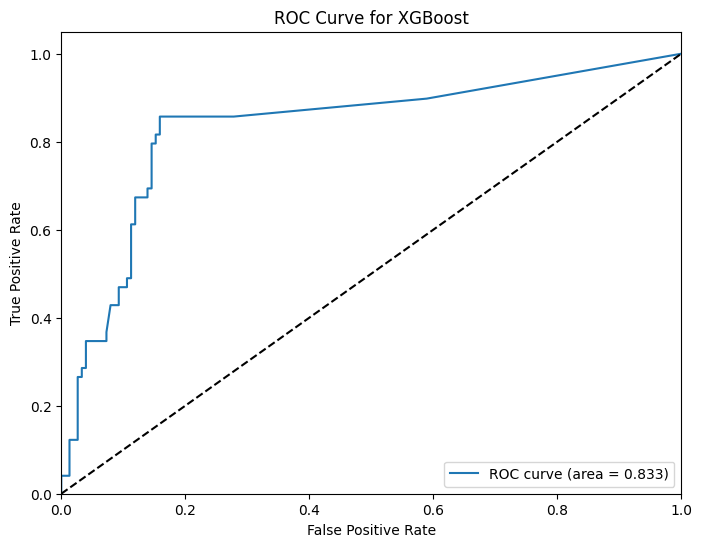

In [55]:
auc_xgb_adasyn = xgb_model.plot_auc(baseline=False)

### Tuned Model Explanation

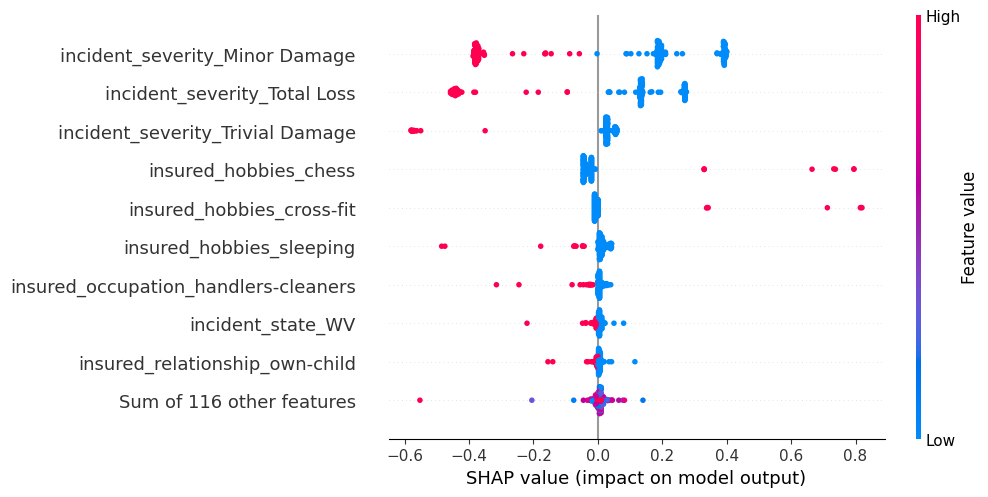

In [56]:
xgb_model.shap_explanation()

<Axes: title={'center': 'Tuned XGBoost Feature Importance (ADASYN)'}, xlabel='F score', ylabel='Features'>

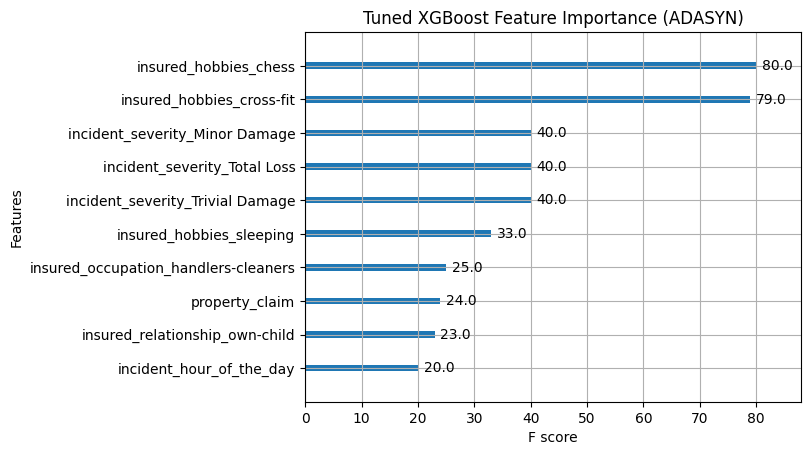

In [57]:
xgb.plot_importance(xgb_model.tuned_model, title="Tuned XGBoost Feature Importance (ADASYN)", max_num_features=10)

## Random Oversampler Results with Tuning

In [58]:
xgb_model.finetune(oversampling_strategy="RandomOverSampler")

[I 2024-04-12 17:42:17,016] A new study created in memory with name: no-name-064869ff-0b8b-46b3-837b-07a0e219524c


Model has already been finetuned. Existing hyperparameters will discarded.


[I 2024-04-12 17:42:17,481] Trial 0 finished with value: 0.74260637372844 and parameters: {'n_estimators': 155, 'max_depth': 10, 'learning_rate': 0.2, 'subsample': 1.0, 'colsample_bytree': 0.9000000000000001, 'gamma': 3.8000000000000003, 'reg_alpha': 0.9, 'reg_lambda': 1.3}. Best is trial 0 with value: 0.74260637372844.
[I 2024-04-12 17:42:17,649] Trial 1 finished with value: 0.6410060033805445 and parameters: {'n_estimators': 22, 'max_depth': 35, 'learning_rate': 0.06999999999999999, 'subsample': 0.25, 'colsample_bytree': 0.4, 'gamma': 3.8000000000000003, 'reg_alpha': 4.7, 'reg_lambda': 3.1}. Best is trial 0 with value: 0.74260637372844.
[I 2024-04-12 17:42:19,603] Trial 2 finished with value: 0.6116512624740473 and parameters: {'n_estimators': 484, 'max_depth': 6, 'learning_rate': 0.33, 'subsample': 0.4, 'colsample_bytree': 0.30000000000000004, 'gamma': 0.0, 'reg_alpha': 2.0, 'reg_lambda': 4.1000000000000005}. Best is trial 0 with value: 0.74260637372844.
[I 2024-04-12 17:42:19,866] 

(0.7612811551681984,
 {'n_estimators': 449,
  'max_depth': 8,
  'learning_rate': 0.2,
  'subsample': 0.95,
  'colsample_bytree': 0.8500000000000001,
  'gamma': 1.4000000000000001,
  'reg_alpha': 4.0,
  'reg_lambda': 3.0})

In [59]:
xgb_model.train_predict(oversampling_strategy="RandomOverSampler")
xgb_model.evaluate()

{'accuracy': 0.845,
 'precision': 0.640625,
 'recall': 0.8367346938775511,
 'f1_score': 0.7256637168141593}

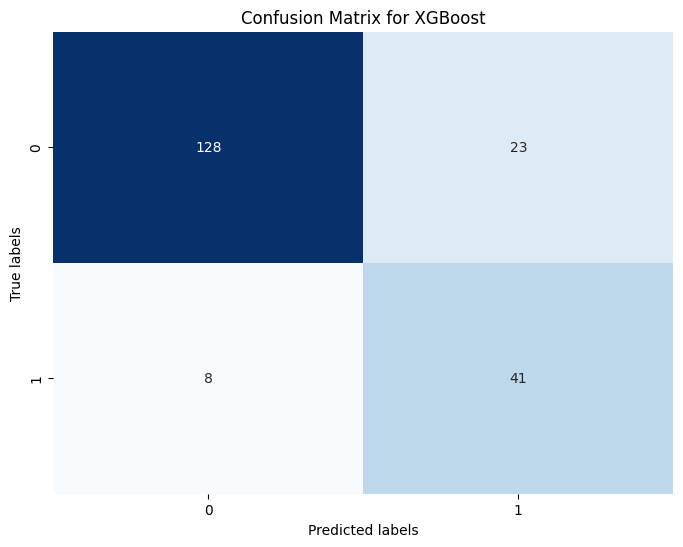

In [60]:
cm_xgb_tuned = xgb_model.plot_confusion_matrix()

(200,)


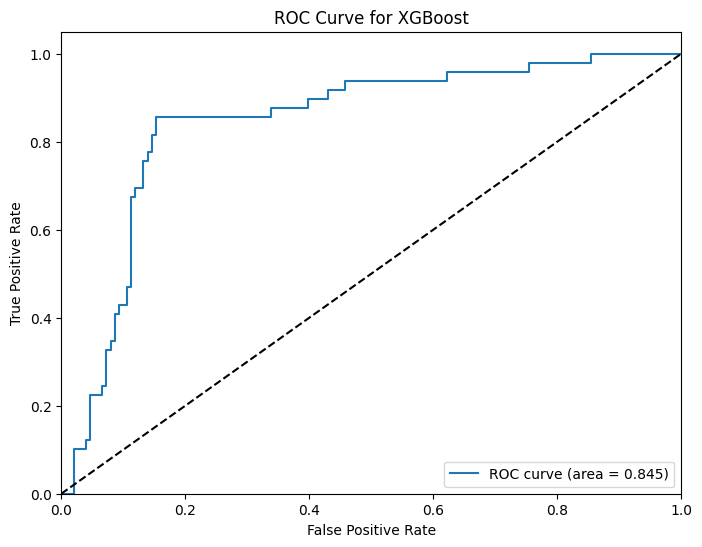

In [61]:
auc_xgb_randomsample = xgb_model.plot_auc(baseline=False)

### Tuned Model Explanation

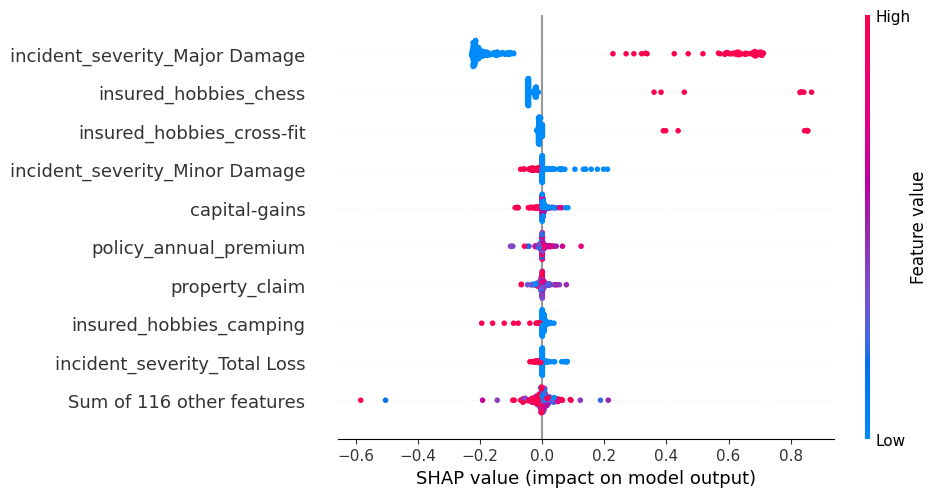

In [62]:
xgb_model.shap_explanation()

<Axes: title={'center': 'Tuned XGBoost Feature Importance (RandomOverSampler)'}, xlabel='F score', ylabel='Features'>

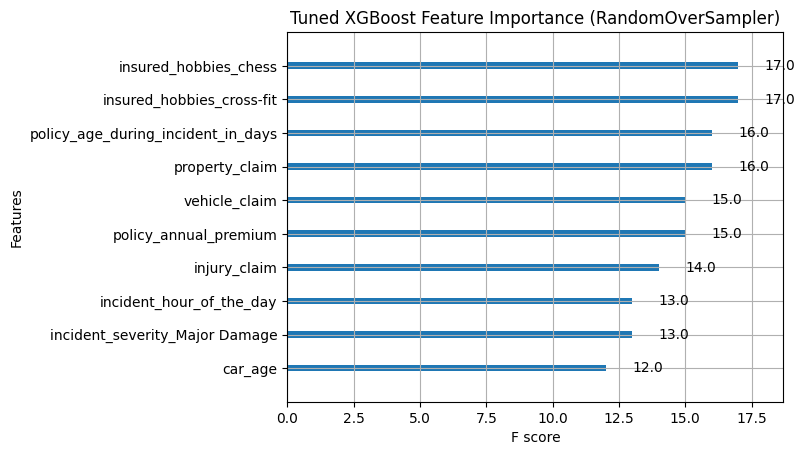

In [63]:
xgb.plot_importance(xgb_model.tuned_model, title="Tuned XGBoost Feature Importance (RandomOverSampler)", max_num_features=10)

# MLP

## Dataset creation

In [108]:
X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = preprocessing.preprocess_pipeline(
    df,
    encoding = True,
    normalization = True,
    )

In [109]:
from sklearn.neural_network import MLPClassifier
mlp_static_params = {
    "random_state": 42,
    "solver": "adam" # Enable categorical data
}
mlp_model = models.IndividualModel(
    model_func=MLPClassifier,
    param_info=parameters.MLP_INFORMATION,
    X_train=X_train_mlp,
    X_test=X_test_mlp,
    y_train=y_train_mlp,
    y_test=y_test_mlp,
    static_params = mlp_static_params
)

## Baseline

In [110]:
mlp_model.train_predict_eval(oversampling_strategy="SMOTENC", baseline=True)

{'accuracy': 0.825,
 'precision': 0.6129032258064516,
 'recall': 0.7755102040816326,
 'f1_score': 0.6846846846846848}

In [ ]:
mlp_model.finetune()

[I 2024-04-07 16:23:19,637] A new study created in memory with name: no-name-be1b351c-151a-4955-8902-bbedbd808fcc
[I 2024-04-07 16:23:25,251] Trial 0 finished with value: 0.524515780980207 and parameters: {'hidden_layer_sizes': 70, 'alpha': 0.0025337416961595527, 'learning_rate_init': 0.006164926704677976, 'max_iter': 350}. Best is trial 0 with value: 0.524515780980207.
[I 2024-04-07 16:23:31,551] Trial 1 finished with value: 0.35508594983967073 and parameters: {'hidden_layer_sizes': 120, 'alpha': 0.0009697385133197264, 'learning_rate_init': 0.0027824169435152865, 'max_iter': 550}. Best is trial 0 with value: 0.524515780980207.
[I 2024-04-07 16:23:38,447] Trial 2 finished with value: 0.4194701938876551 and parameters: {'hidden_layer_sizes': 190, 'alpha': 0.0024827611755023375, 'learning_rate_init': 0.002502126907743748, 'max_iter': 650}. Best is trial 0 with value: 0.524515780980207.
[I 2024-04-07 16:23:44,860] Trial 3 finished with value: 0.39284282470868537 and parameters: {'hidden_l

(0.6747273734215314,
 {'hidden_layer_sizes': 170,
  'alpha': 0.0007957777623102827,
  'learning_rate_init': 0.0008892064354854472,
  'max_iter': 350})

In [ ]:
mlp_model.train_predict()

mlp_model.evaluate()

{'accuracy': 0.375,
 'precision': 0.27906976744186046,
 'recall': 0.9795918367346939,
 'f1_score': 0.4343891402714932}

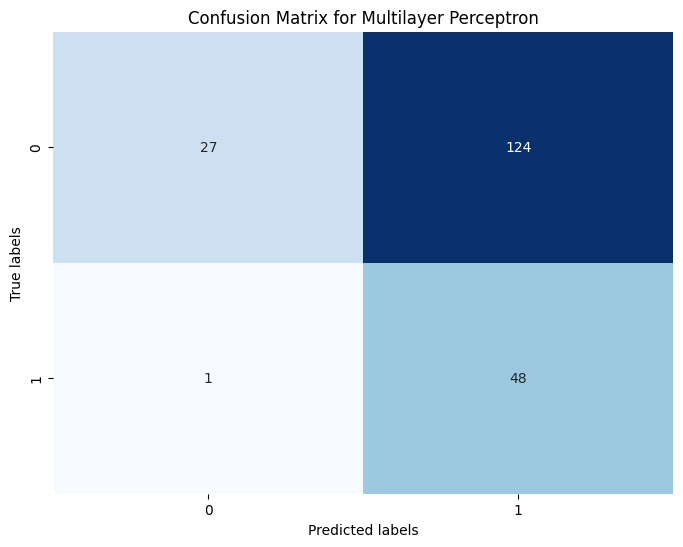

In [ ]:
cm_mlp_tuned = mlp_model.plot_confusion_matrix()

PermutationExplainer explainer: 201it [00:13,  3.64it/s]                         


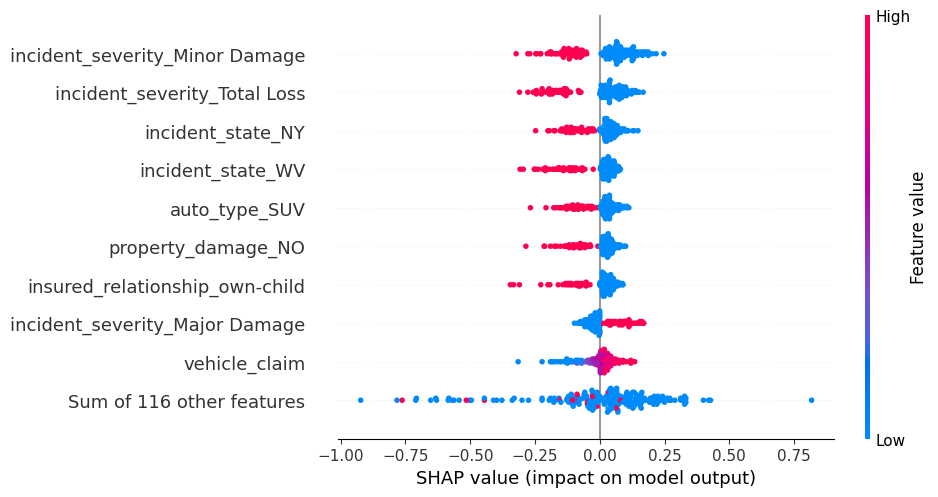

In [ ]:
mlp_model.shap_explanation()

# LightGBM

In [86]:
X_train_lgb, X_test_lgb, y_train_lgb, y_test_lgb = preprocessing.preprocess_pipeline(
    df,
    encoding = True,
    normalization = False, # Gradient boosting agnostic to normalisation
    )

In [87]:
import lightgbm as lgb


In [88]:
lgb_static_params = {
    "random_state": 42,
    "verbose": -1,
}

lgb_model = models.IndividualModel(
    model_func=lgb.LGBMClassifier,
    param_info=parameters.LGBM_INFORMATION,
    X_train=X_train_lgb,
    X_test=X_test_lgb,
    y_train=y_train_lgb,
    y_test=y_test_lgb,
    static_params=lgb_static_params
)

In [89]:
lgb_model.train_predict_eval(oversampling_strategy="SMOTENC", baseline=True)

{'accuracy': 0.815,
 'precision': 0.6153846153846154,
 'recall': 0.6530612244897959,
 'f1_score': 0.6336633663366337}

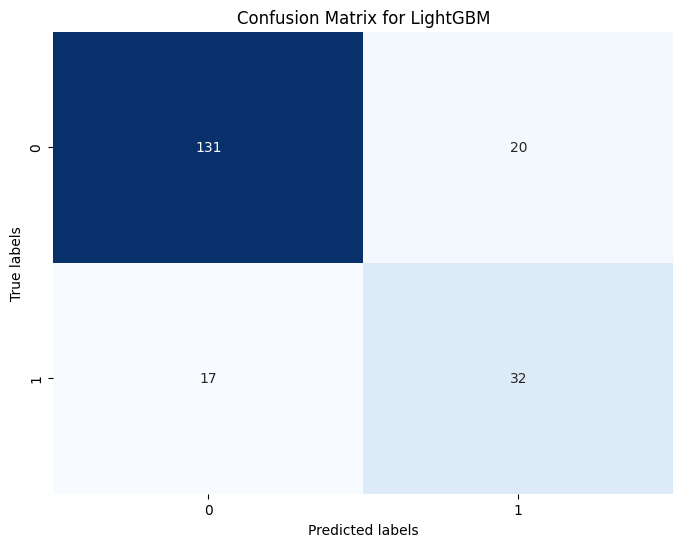

In [90]:
cm_lgb_base = lgb_model.plot_confusion_matrix()

(200,)


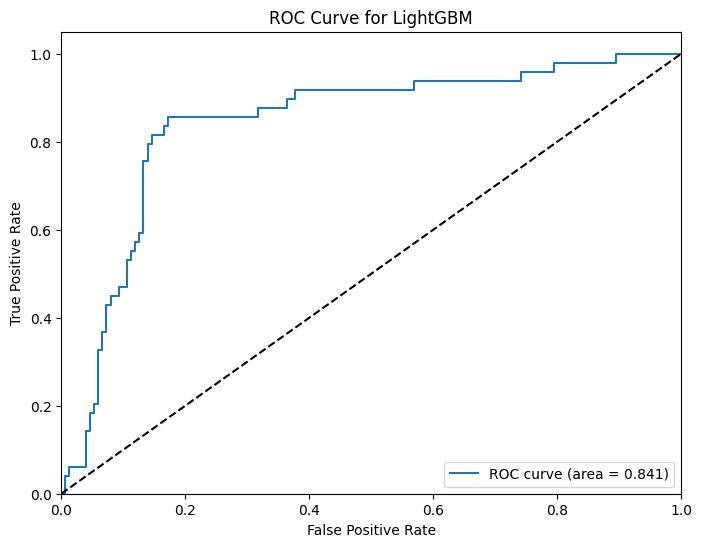

In [91]:
auc_lgb_base = lgb_model.plot_auc(baseline=True)

PermutationExplainer explainer: 201it [00:15,  4.39it/s]                         


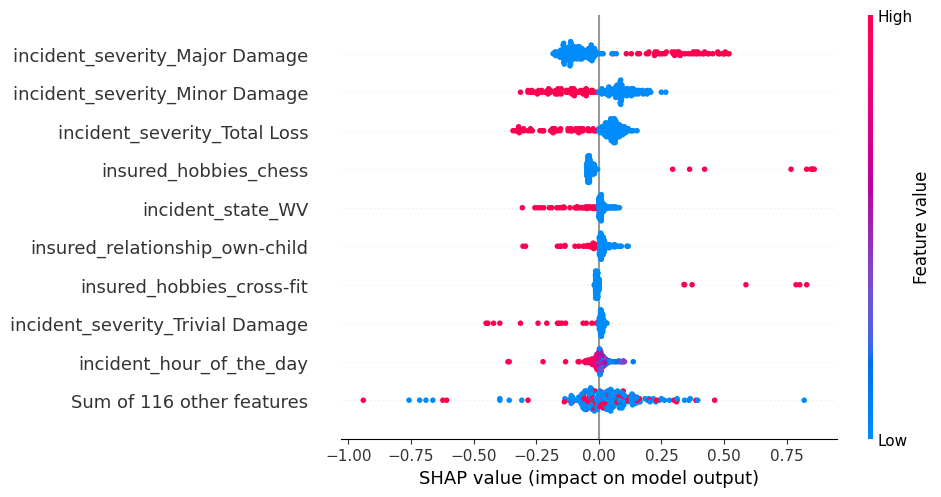

In [92]:
lgb_model.shap_explanation(baseline=True)

## SMOTENC with Tuning

In [93]:
lgb_model.finetune(oversampling_strategy="SMOTENC")

[I 2024-04-13 03:32:59,238] A new study created in memory with name: no-name-4b8a136a-70ff-45d9-9772-25819f0ad0b0
[I 2024-04-13 03:33:03,399] Trial 0 finished with value: 0.6114109830092839 and parameters: {'n_estimators': 350, 'num_leaves': 39, 'learning_rate': 0.18803002430053328, 'subsample': 0.25, 'colsample_bytree': 0.2, 'min_child_samples': 15, 'reg_alpha': 8.537053411301702, 'reg_lambda': 8.594297784152081}. Best is trial 0 with value: 0.6114109830092839.
[I 2024-04-13 03:33:08,022] Trial 1 finished with value: 0.6379008818883274 and parameters: {'n_estimators': 500, 'num_leaves': 5, 'learning_rate': 0.060817831214827985, 'subsample': 0.4, 'colsample_bytree': 0.5, 'min_child_samples': 23, 'reg_alpha': 0.0014164543912038364, 'reg_lambda': 0.01955297332512672}. Best is trial 1 with value: 0.6379008818883274.
[I 2024-04-13 03:33:12,420] Trial 2 finished with value: 0.6216590158917524 and parameters: {'n_estimators': 250, 'num_leaves': 35, 'learning_rate': 0.020298664885036732, 'sub

(0.710178901268986,
 {'n_estimators': 100,
  'num_leaves': 148,
  'learning_rate': 0.1485023100776579,
  'subsample': 0.8500000000000001,
  'colsample_bytree': 0.7500000000000001,
  'min_child_samples': 11,
  'reg_alpha': 1.5072102857938577e-07,
  'reg_lambda': 2.651919424678569e-05})

In [94]:
lgb_model.train_predict_eval(oversampling_strategy="SMOTENC", baseline=False)

{'accuracy': 0.835,
 'precision': 0.6538461538461539,
 'recall': 0.6938775510204082,
 'f1_score': 0.6732673267326732}

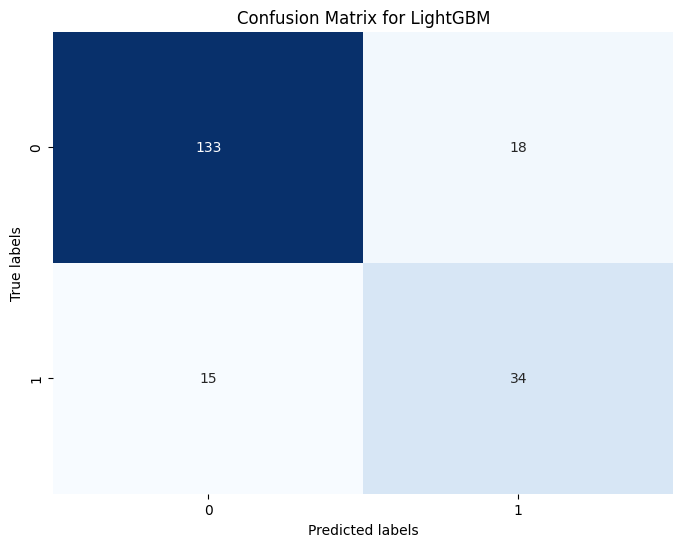

In [95]:
cm_lgb_tuned = lgb_model.plot_confusion_matrix()

(200,)


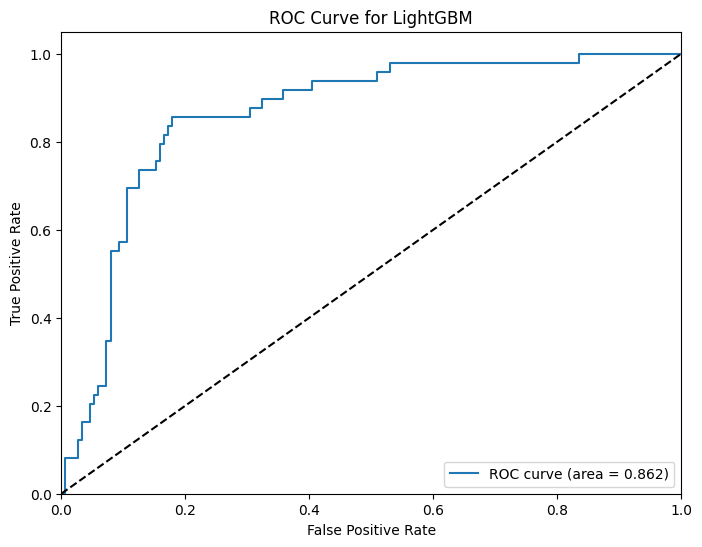

In [96]:
auc_lgb_base = lgb_model.plot_auc(baseline=False)

PermutationExplainer explainer: 201it [00:15,  4.49it/s]                         


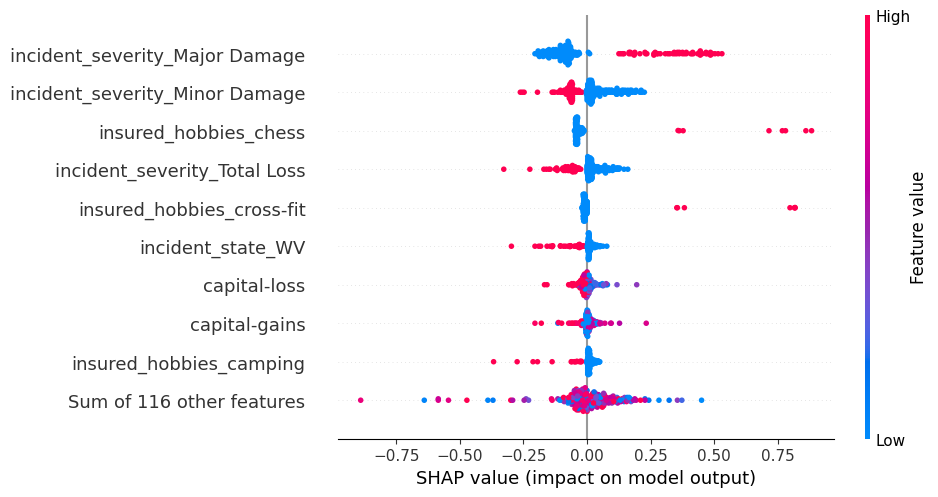

In [97]:
lgb_model.shap_explanation(baseline = False)

## Random Oversampler with Tuning

In [98]:
lgb_model.finetune(oversampling_strategy = 'RandomOverSampler')

[I 2024-04-13 03:41:12,394] A new study created in memory with name: no-name-ac46babe-ebc4-4ddf-8e08-6782bdf22f49


Model has already been finetuned. Existing hyperparameters will discarded.


[I 2024-04-13 03:41:13,073] Trial 0 finished with value: 0.6550036450656904 and parameters: {'n_estimators': 450, 'num_leaves': 22, 'learning_rate': 0.19337411142562783, 'subsample': 0.95, 'colsample_bytree': 0.7500000000000001, 'min_child_samples': 25, 'reg_alpha': 1.1969743817039846e-06, 'reg_lambda': 0.00026361906111755176}. Best is trial 0 with value: 0.6550036450656904.
[I 2024-04-13 03:41:13,942] Trial 1 finished with value: 0.5239444510198445 and parameters: {'n_estimators': 500, 'num_leaves': 44, 'learning_rate': 0.19454496401123403, 'subsample': 0.9000000000000001, 'colsample_bytree': 0.2, 'min_child_samples': 12, 'reg_alpha': 2.2594351374417692e-08, 'reg_lambda': 0.004180440700364706}. Best is trial 0 with value: 0.6550036450656904.
[I 2024-04-13 03:41:14,523] Trial 2 finished with value: 0.5969257044325537 and parameters: {'n_estimators': 300, 'num_leaves': 62, 'learning_rate': 0.16667952462983704, 'subsample': 0.8500000000000001, 'colsample_bytree': 0.25, 'min_child_samples

(0.7648845629061082,
 {'n_estimators': 500,
  'num_leaves': 82,
  'learning_rate': 0.038770214294335,
  'subsample': 0.2,
  'colsample_bytree': 0.9500000000000001,
  'min_child_samples': 16,
  'reg_alpha': 6.257001295309068,
  'reg_lambda': 0.0556687886391244})

In [99]:
lgb_model.train_predict_eval(oversampling_strategy='RandomOverSampler', baseline=False)

{'accuracy': 0.83,
 'precision': 0.6190476190476191,
 'recall': 0.7959183673469388,
 'f1_score': 0.6964285714285715}

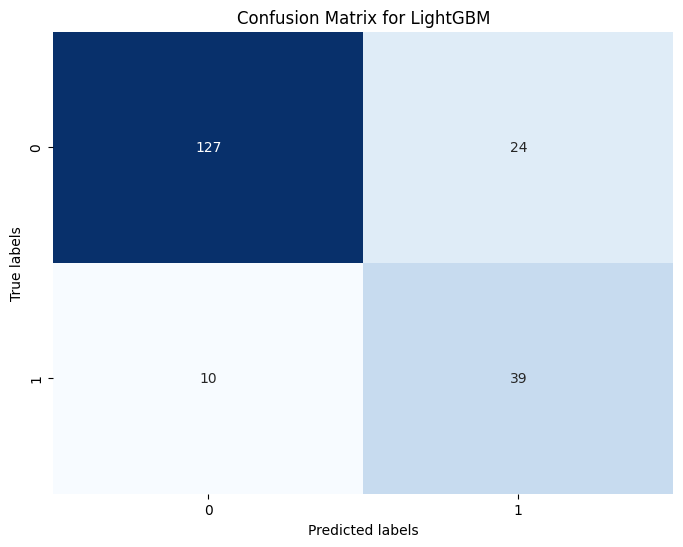

In [100]:
cm_lgb_tuned = lgb_model.plot_confusion_matrix()

(200,)


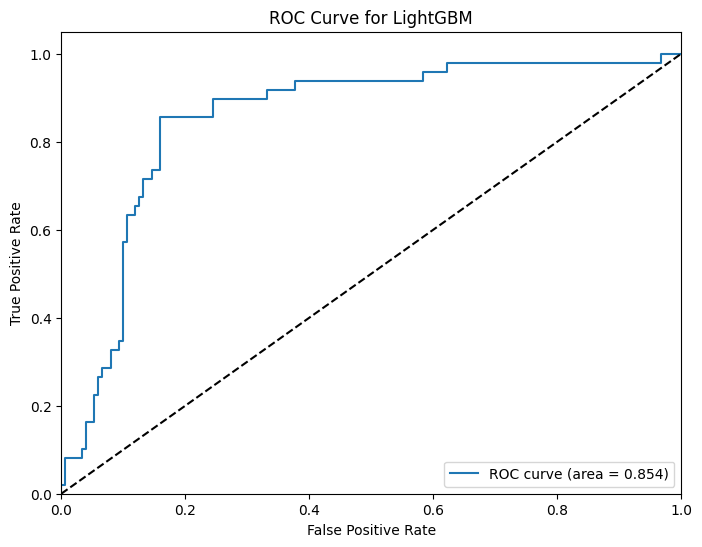

In [101]:
auc_lgb_base = lgb_model.plot_auc(baseline=False)

PermutationExplainer explainer: 201it [00:15,  4.65it/s]                         


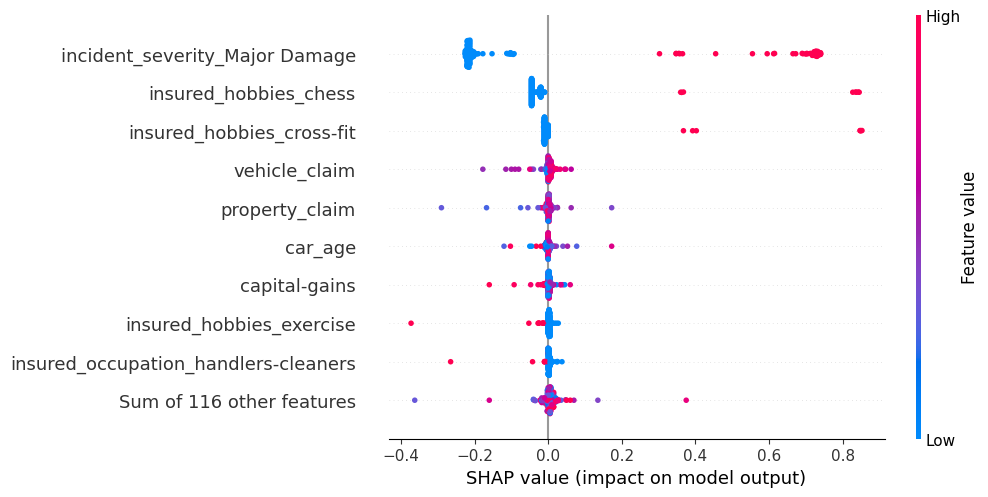

In [102]:
lgb_model.shap_explanation(baseline = False)

## ADASYN Oversampling

In [103]:
lgb_model.finetune(oversampling_strategy = 'ADASYN')

[I 2024-04-13 03:42:52,986] A new study created in memory with name: no-name-be717bb6-9a6b-4aa6-887c-33fcd138ce1a


Model has already been finetuned. Existing hyperparameters will discarded.


[I 2024-04-13 03:42:53,874] Trial 0 finished with value: 0.6390569800569801 and parameters: {'n_estimators': 200, 'num_leaves': 135, 'learning_rate': 0.08682208415752729, 'subsample': 0.55, 'colsample_bytree': 1.0, 'min_child_samples': 23, 'reg_alpha': 9.199943141624519e-08, 'reg_lambda': 3.1190812884686432e-06}. Best is trial 0 with value: 0.6390569800569801.
[I 2024-04-13 03:42:54,789] Trial 1 finished with value: 0.6296884500402798 and parameters: {'n_estimators': 300, 'num_leaves': 19, 'learning_rate': 0.1834382261973206, 'subsample': 0.55, 'colsample_bytree': 0.7500000000000001, 'min_child_samples': 22, 'reg_alpha': 0.0005101768772230278, 'reg_lambda': 0.007549215183614182}. Best is trial 0 with value: 0.6390569800569801.
[I 2024-04-13 03:42:55,325] Trial 2 finished with value: 0.6469838097320063 and parameters: {'n_estimators': 450, 'num_leaves': 6, 'learning_rate': 0.04490602090851396, 'subsample': 0.8500000000000001, 'colsample_bytree': 0.3, 'min_child_samples': 4, 'reg_alpha':

(0.7200845176266315,
 {'n_estimators': 250,
  'num_leaves': 5,
  'learning_rate': 0.016411403086512285,
  'subsample': 0.6000000000000001,
  'colsample_bytree': 0.9000000000000001,
  'min_child_samples': 15,
  'reg_alpha': 0.6998390253411017,
  'reg_lambda': 2.0515876397307096e-06})

In [104]:
lgb_model.train_predict_eval(oversampling_strategy="ADASYN", baseline=False)

{'accuracy': 0.85,
 'precision': 0.6461538461538462,
 'recall': 0.8571428571428571,
 'f1_score': 0.736842105263158}

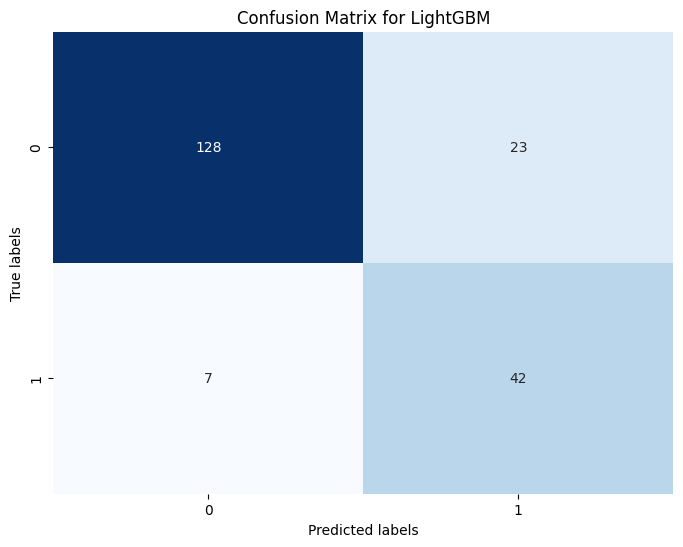

In [105]:
cm_lgb_tuned = lgb_model.plot_confusion_matrix()

(200,)


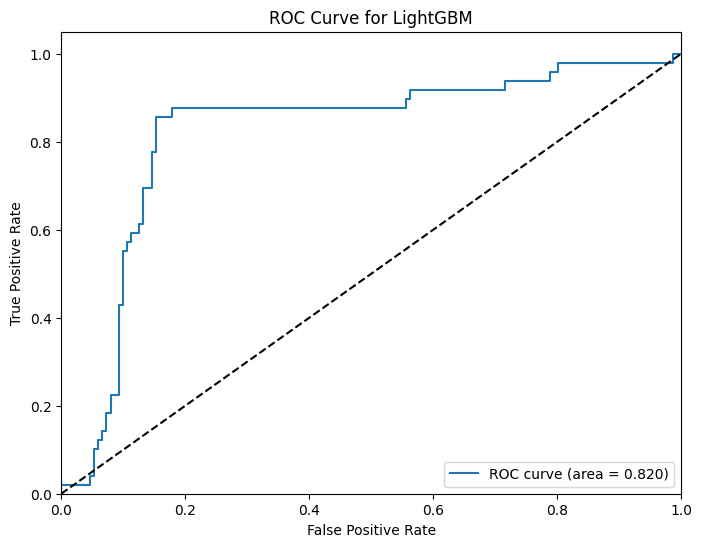

In [106]:
auc_lgb_base = lgb_model.plot_auc(baseline=False)

PermutationExplainer explainer: 201it [00:14,  4.27it/s]                         


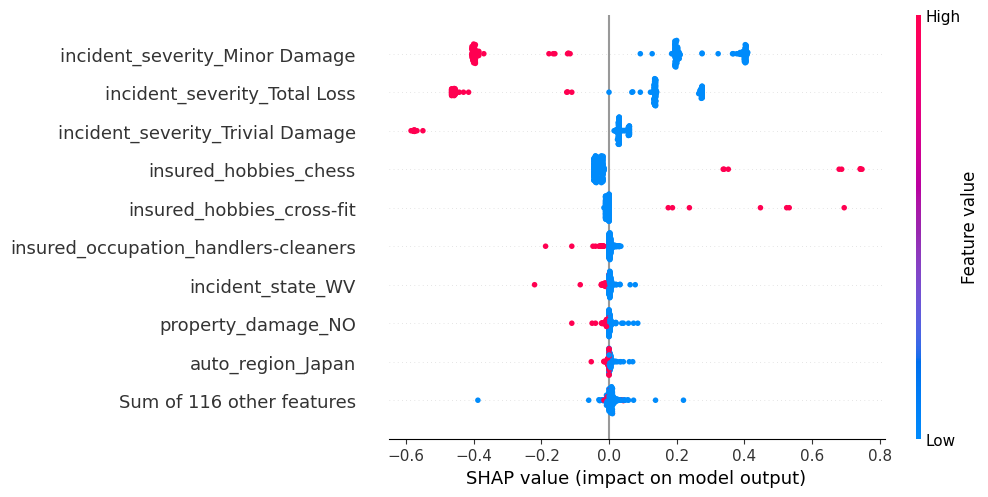

In [107]:
lgb_model.shap_explanation(baseline = False)

# Logistic Regression

In [54]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = preprocessing.preprocess_pipeline(
    df,
    encoding = True,
    normalization = True, # LR needs normalisation
    )

In [61]:
from sklearn.linear_model import LogisticRegression

lr_static_params = {
    "max_iter": 10000
}
lr_model = models.IndividualModel(
    model_func= LogisticRegression,
    param_info=parameters.LOGISTIC_REGRESSION_INFORMATION,
    X_train=X_train_lr,
    X_test=X_test_lr,
    y_train=y_train_lr,
    y_test=y_test_lr,
    static_params = lr_static_params
)

## SMOTENC Baseline

In [62]:
lr_model.train_predict_eval(oversampling_strategy="SMOTENC", baseline=True)

{'accuracy': 0.835,
 'precision': 0.6904761904761905,
 'recall': 0.5918367346938775,
 'f1_score': 0.6373626373626373}

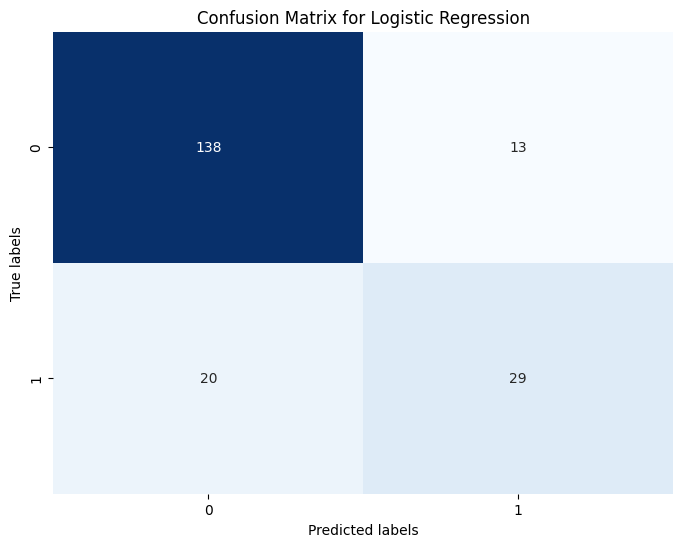

In [63]:
cm_lr_base = lr_model.plot_confusion_matrix()

## SMOTENC Tuning

In [64]:
lr_model.finetune()

[I 2024-04-13 01:42:36,249] A new study created in memory with name: no-name-5c620a3b-1fe8-41ba-bd43-7888ea233032
[I 2024-04-13 01:42:41,450] Trial 0 finished with value: 0.6011338308047848 and parameters: {'C': 0.25203791027559463, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.6011338308047848.
[I 2024-04-13 01:43:15,399] Trial 1 finished with value: 0.6063666211686011 and parameters: {'C': 8.415052533366536, 'solver': 'sag'}. Best is trial 1 with value: 0.6063666211686011.
[I 2024-04-13 01:43:20,383] Trial 2 finished with value: 0.6432236604265069 and parameters: {'C': 0.5468299672880876, 'solver': 'lbfgs'}. Best is trial 2 with value: 0.6432236604265069.
[I 2024-04-13 01:43:26,163] Trial 3 finished with value: 0.67649384981757 and parameters: {'C': 8.005317638959909, 'solver': 'lbfgs'}. Best is trial 3 with value: 0.67649384981757.
[I 2024-04-13 01:44:07,712] Trial 4 finished with value: 0.6084856458892969 and parameters: {'C': 9.880603826344286, 'solver': 'saga'}. Best is trial

(0.6866950046021254, {'C': 5.9508102792285325, 'solver': 'lbfgs'})

In [65]:
lr_model.train_predict_eval(oversampling_strategy="SMOTENC", baseline=False)

{'accuracy': 0.81,
 'precision': 0.6341463414634146,
 'recall': 0.5306122448979592,
 'f1_score': 0.5777777777777778}

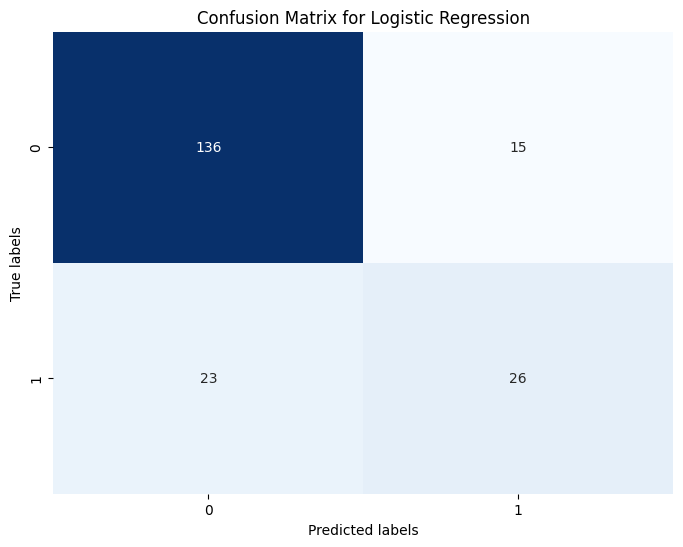

In [66]:
cm_lr_base = lr_model.plot_confusion_matrix()

(200,)


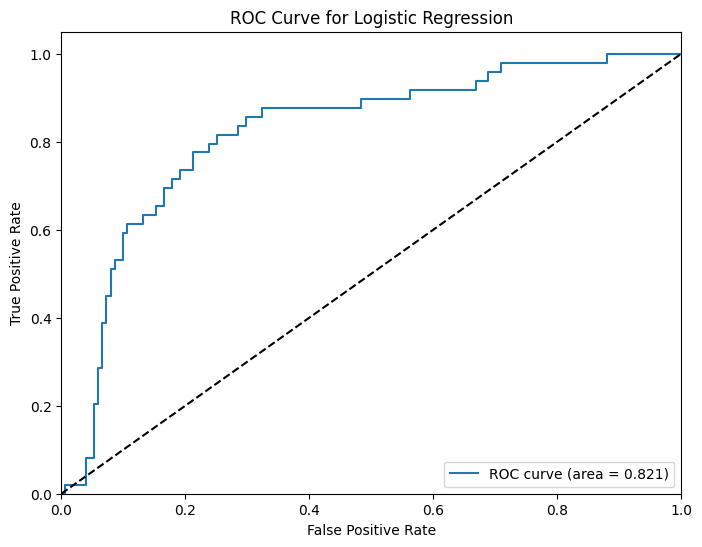

In [67]:
auc_lr_base = lr_model.plot_auc(baseline=False)

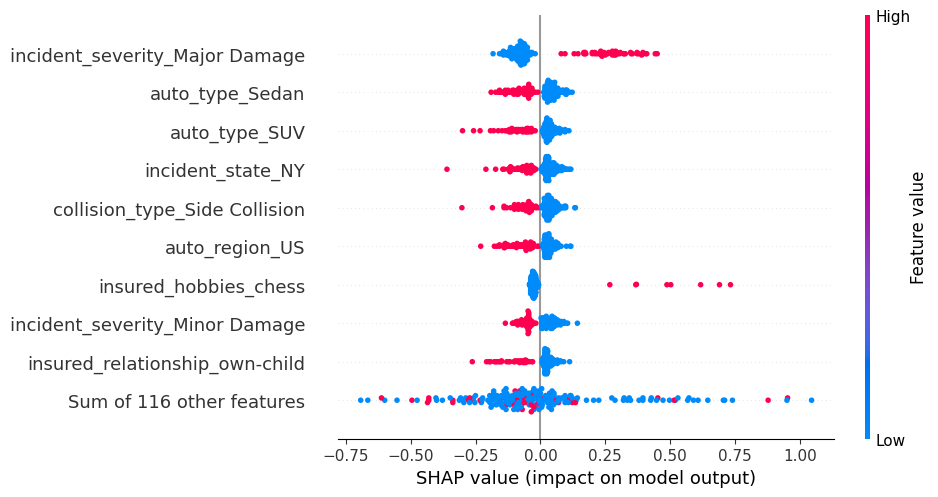

In [68]:
lr_model.shap_explanation()

## Random Oversampling with tuning

In [69]:
lr_model.finetune(oversampling_strategy = 'RandomOverSampler')

[I 2024-04-13 02:03:42,463] A new study created in memory with name: no-name-04365a19-60b7-467d-a26c-64319f8cab21


Model has already been finetuned. Existing hyperparameters will discarded.


[I 2024-04-13 02:04:15,608] Trial 0 finished with value: 0.5738810908978976 and parameters: {'C': 8.488339756859151, 'solver': 'saga'}. Best is trial 0 with value: 0.5738810908978976.
[I 2024-04-13 02:04:42,101] Trial 1 finished with value: 0.6137527370160216 and parameters: {'C': 3.8934026864351265, 'solver': 'sag'}. Best is trial 1 with value: 0.6137527370160216.
[I 2024-04-13 02:05:08,857] Trial 2 finished with value: 0.6137527370160216 and parameters: {'C': 3.555648147161334, 'solver': 'sag'}. Best is trial 1 with value: 0.6137527370160216.
[I 2024-04-13 02:05:35,533] Trial 3 finished with value: 0.6137527370160216 and parameters: {'C': 3.8558350752673483, 'solver': 'sag'}. Best is trial 1 with value: 0.6137527370160216.
[I 2024-04-13 02:05:36,411] Trial 4 finished with value: 0.6692784156583271 and parameters: {'C': 8.834173389143738, 'solver': 'newton-cg'}. Best is trial 4 with value: 0.6692784156583271.
[I 2024-04-13 02:05:37,955] Trial 5 finished with value: 0.6662480209125566 

(0.7199620292969817, {'C': 0.14404212468866687, 'solver': 'newton-cg'})

In [70]:
lr_model.train_predict_eval(oversampling_strategy="RandomOverSampler", baseline=False)

{'accuracy': 0.845,
 'precision': 0.65,
 'recall': 0.7959183673469388,
 'f1_score': 0.7155963302752293}

(200,)


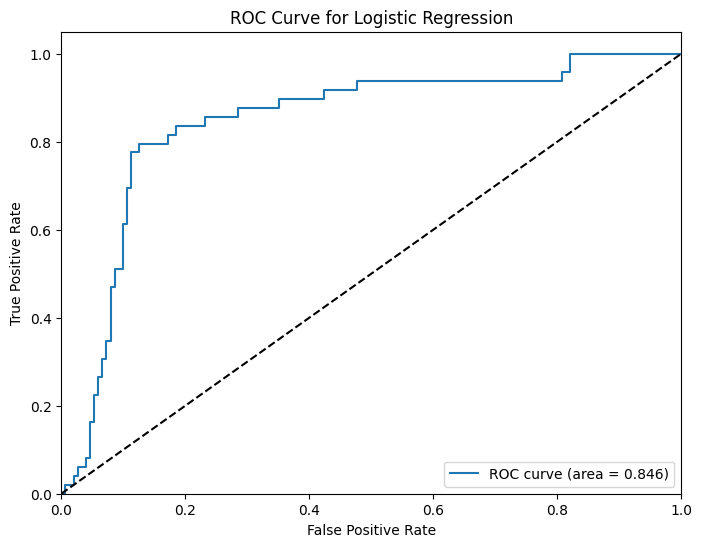

In [71]:
auc_lr_base = lr_model.plot_auc(baseline=False)

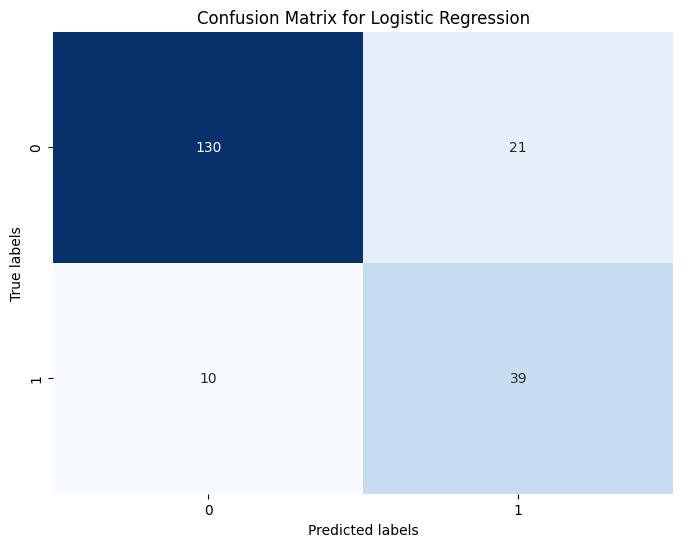

In [72]:
cm_lr = lr_model.plot_confusion_matrix()

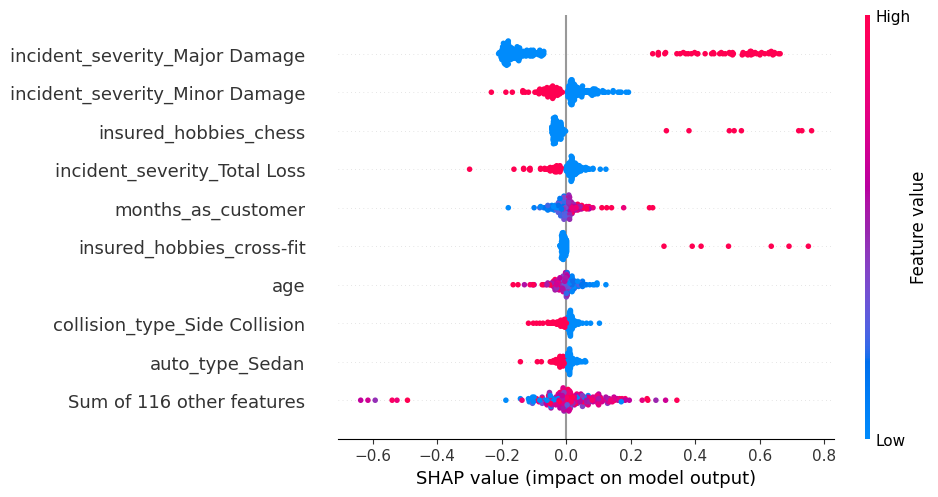

In [74]:
lr_model.shap_explanation()

## ADASYN with tuning

In [75]:
lr_model.finetune(oversampling_strategy = 'ADASYN')

[I 2024-04-13 02:20:33,207] A new study created in memory with name: no-name-7bd19dcb-24d3-4eb4-9f0a-814600642228


Model has already been finetuned. Existing hyperparameters will discarded.


[I 2024-04-13 02:20:33,912] Trial 0 finished with value: 0.6545166340508806 and parameters: {'C': 0.895176080362327, 'solver': 'newton-cg'}. Best is trial 0 with value: 0.6545166340508806.
[I 2024-04-13 02:21:06,501] Trial 1 finished with value: 0.5886570812899208 and parameters: {'C': 9.204269505105946, 'solver': 'saga'}. Best is trial 0 with value: 0.6545166340508806.
[I 2024-04-13 02:21:08,272] Trial 2 finished with value: 0.6778343820626637 and parameters: {'C': 6.97855898583742, 'solver': 'lbfgs'}. Best is trial 2 with value: 0.6778343820626637.
[I 2024-04-13 02:21:09,174] Trial 3 finished with value: 0.6703312543312543 and parameters: {'C': 3.2093797351283895, 'solver': 'newton-cg'}. Best is trial 2 with value: 0.6778343820626637.
[I 2024-04-13 02:21:35,269] Trial 4 finished with value: 0.6143085109256409 and parameters: {'C': 3.449920534137585, 'solver': 'sag'}. Best is trial 2 with value: 0.6778343820626637.
[I 2024-04-13 02:21:36,912] Trial 5 finished with value: 0.67974989793

(0.6847302531513058, {'C': 2.9657919463637725, 'solver': 'lbfgs'})

In [76]:
lr_model.train_predict_eval(oversampling_strategy="ADASYN", baseline=False)

{'accuracy': 0.825,
 'precision': 0.675,
 'recall': 0.5510204081632653,
 'f1_score': 0.6067415730337078}

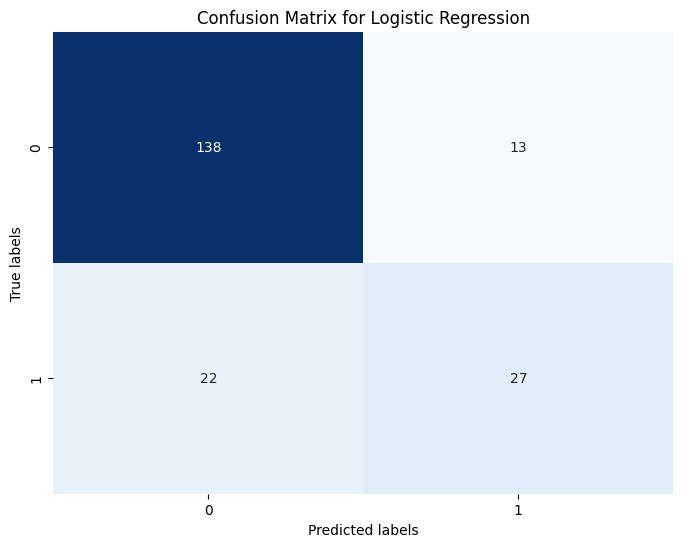

In [77]:
cm_lr = lr_model.plot_confusion_matrix()

(200,)


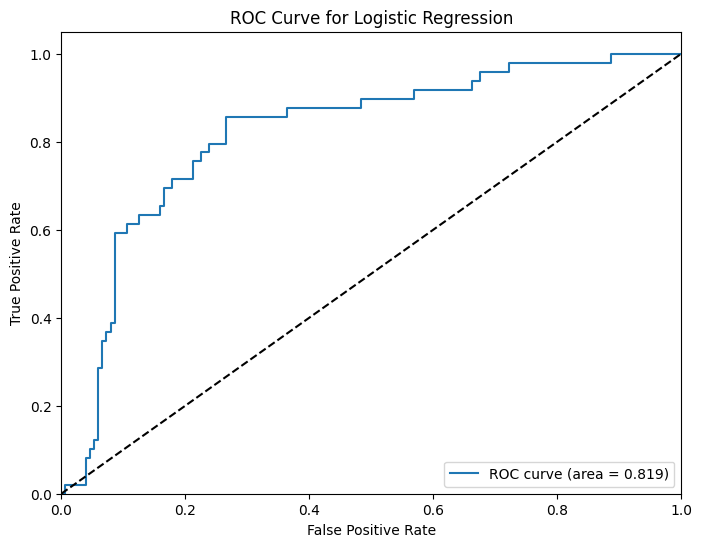

In [78]:
auc_lr_base = lr_model.plot_auc(baseline=False)

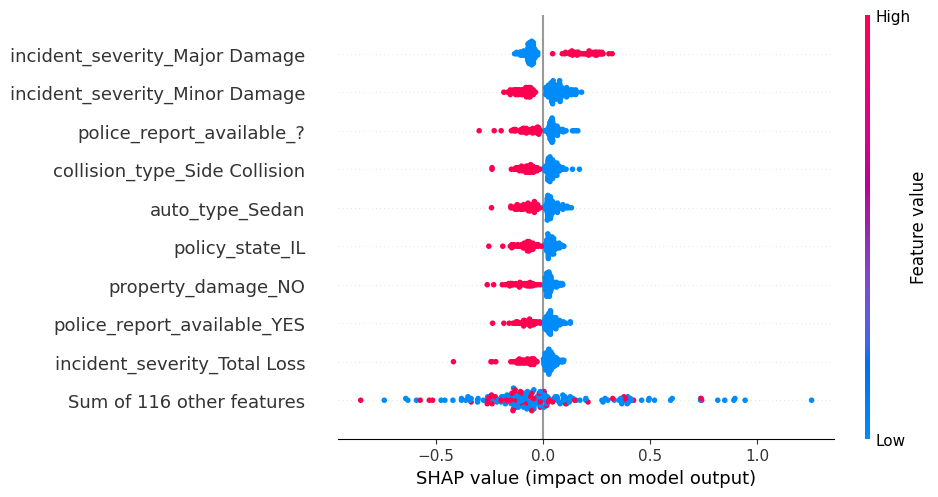

In [79]:
lr_model.shap_explanation()

# Support Vector Machine

In [80]:
X_train_svm, X_test_svm, y_train_svm, y_test_svm = preprocessing.preprocess_pipeline(
    df,
    encoding = True,
    normalization = True, # SVM needs normalisation
    )

In [81]:
from sklearn import svm

svm_static_params = {
    "cache_size": 500,
    "probability": False,
    "gamma": 'scale'
}

svm_model = models.IndividualModel(
    model_func= svm.SVC,
    param_info=parameters.SVM_INFORMATION,
    X_train=X_train_svm,
    X_test=X_test_svm,
    y_train=y_train_svm,
    y_test=y_test_svm,
    static_params = svm_static_params
)

In [26]:
# Train the model
svm_model.train(baseline=True)

# Predict labels for the test set
svm_model.predict(baseline=True)

# Evaluate
svm_model.evaluate(baseline=True)

{'accuracy': 0.7,
 'precision': 0.43373493975903615,
 'recall': 0.7346938775510204,
 'f1_score': 0.5454545454545455}

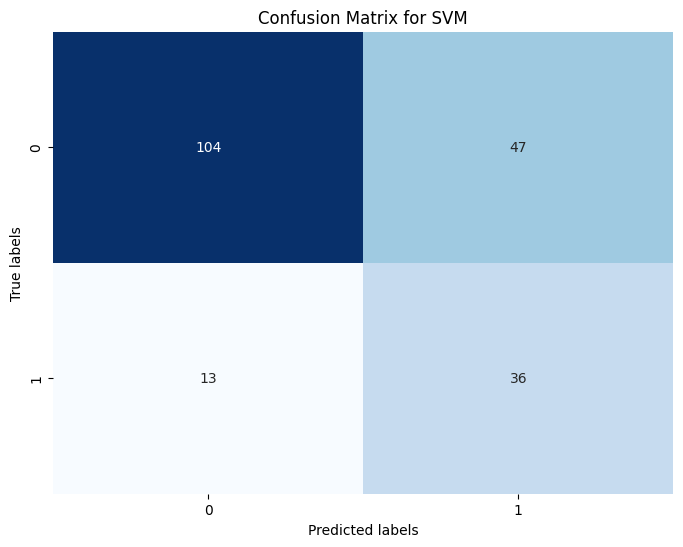

In [27]:
cm_svm_base = svm_model.plot_confusion_matrix()

## With Tuning

In [28]:
svm_model.finetune()

[I 2024-04-11 03:23:41,600] A new study created in memory with name: no-name-44afcccb-484b-4379-89b4-7ce73f966b1e
[I 2024-04-11 03:23:44,395] Trial 0 finished with value: 0.6134893182402116 and parameters: {'C': 0.02084044118287074, 'kernel': 'linear', 'degree': 2, 'coef0': 0.67872715715286}. Best is trial 0 with value: 0.6134893182402116.
[I 2024-04-11 03:23:47,271] Trial 1 finished with value: 0.5116121646508387 and parameters: {'C': 17.414704098630786, 'kernel': 'poly', 'degree': 5, 'coef0': 0.6097146178996163}. Best is trial 0 with value: 0.6134893182402116.
[I 2024-04-11 03:23:50,160] Trial 2 finished with value: 0.5116121646508387 and parameters: {'C': 1.80158948830285, 'kernel': 'poly', 'degree': 5, 'coef0': 0.5201960141601648}. Best is trial 0 with value: 0.6134893182402116.
[I 2024-04-11 03:23:54,138] Trial 3 finished with value: 0.5116121646508387 and parameters: {'C': 0.1470460793286026, 'kernel': 'rbf', 'degree': 2, 'coef0': 0.40890816935450003}. Best is trial 0 with value:

(0.6593941713344699,
 {'C': 0.1147381195272408,
  'kernel': 'linear',
  'degree': 5,
  'coef0': 0.3112230529348774})

In [29]:
svm_model.train_predict()
svm_model.evaluate()

{'accuracy': 0.84,
 'precision': 0.6666666666666666,
 'recall': 0.6938775510204082,
 'f1_score': 0.6799999999999999}

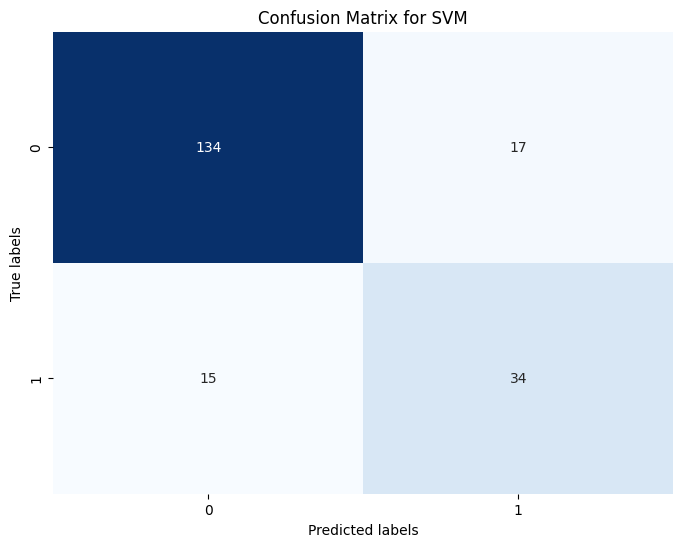

In [30]:
cm_svm = svm_model.plot_confusion_matrix()

PermutationExplainer explainer: 201it [01:50,  1.64it/s]


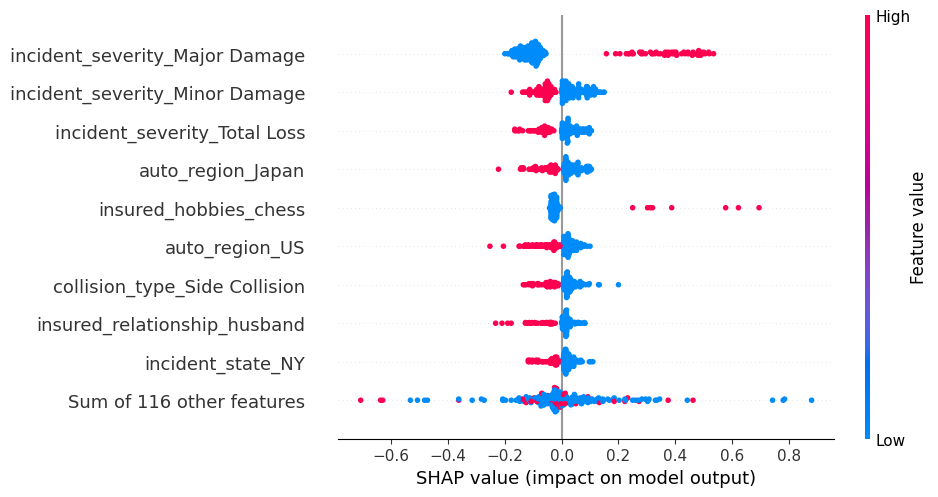

In [31]:
svm_model.shap_explanation()

## Using Random Oversampling

In [32]:
svm_model.finetune(oversampling_strategy = 'RandomOverSampler')

[I 2024-04-11 03:30:41,833] A new study created in memory with name: no-name-e010c799-59b6-4762-8038-9f22ebc59ba1


Model has already been finetuned. Existing hyperparameters will discarded.


[I 2024-04-11 03:30:42,211] Trial 0 finished with value: 0.478021164021164 and parameters: {'C': 9.285049169488891, 'kernel': 'sigmoid', 'degree': 3, 'coef0': 0.12455519447472642}. Best is trial 0 with value: 0.478021164021164.
[I 2024-04-11 03:30:42,576] Trial 1 finished with value: 0.4801085972850679 and parameters: {'C': 1.2186333703651233, 'kernel': 'sigmoid', 'degree': 2, 'coef0': 0.36213855120857735}. Best is trial 1 with value: 0.4801085972850679.
[I 2024-04-11 03:30:42,982] Trial 2 finished with value: 0.4772483164908628 and parameters: {'C': 0.13853742836120175, 'kernel': 'sigmoid', 'degree': 3, 'coef0': 0.2702676766196028}. Best is trial 1 with value: 0.4801085972850679.
[I 2024-04-11 03:30:43,218] Trial 3 finished with value: 0.6328016577176712 and parameters: {'C': 1.2793673314349316, 'kernel': 'linear', 'degree': 3, 'coef0': 0.764283488242219}. Best is trial 3 with value: 0.6328016577176712.
[I 2024-04-11 03:30:43,417] Trial 4 finished with value: 0.6749190658965096 and pa

(0.7466247379454926,
 {'C': 0.04626198505227364,
  'kernel': 'linear',
  'degree': 4,
  'coef0': 0.2038310856711941})

In [33]:
svm_model.train_predict(oversampling_strategy = 'RandomOverSampler')
svm_model.evaluate()

{'accuracy': 0.845,
 'precision': 0.6363636363636364,
 'recall': 0.8571428571428571,
 'f1_score': 0.7304347826086957}

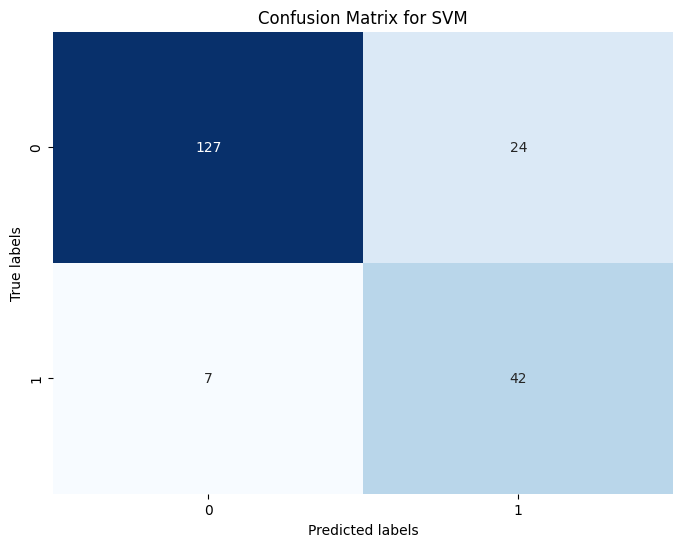

In [34]:
cm_svm = svm_model.plot_confusion_matrix()

PermutationExplainer explainer: 201it [02:42,  1.16it/s]


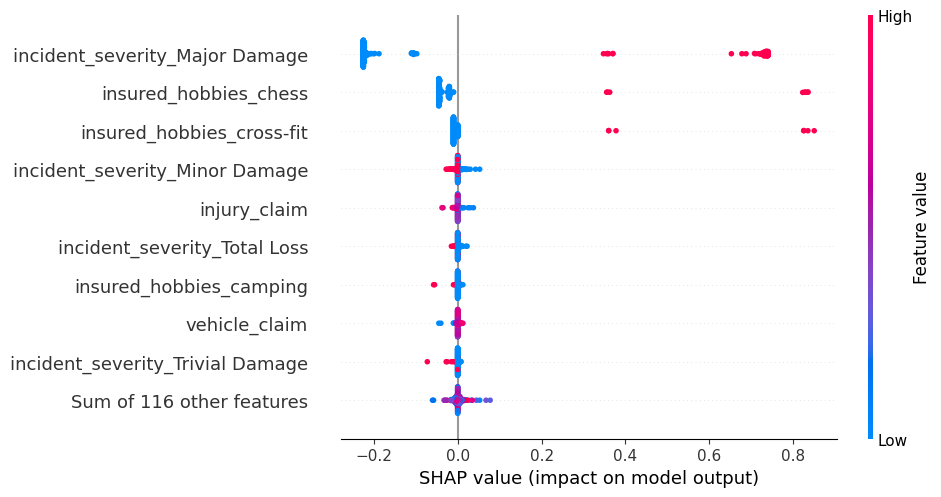

In [35]:
svm_model.shap_explanation()

## Using ADASYN

In [36]:
svm_model.finetune(oversampling_strategy = 'ADASYN')

[I 2024-04-11 03:33:51,915] A new study created in memory with name: no-name-68cdaead-4fc4-4007-b083-bf3642564218


Model has already been finetuned. Existing hyperparameters will discarded.


[I 2024-04-11 03:33:52,280] Trial 0 finished with value: 0.5878208814534608 and parameters: {'C': 29.117636199508404, 'kernel': 'linear', 'degree': 2, 'coef0': 0.13631336898969557}. Best is trial 0 with value: 0.5878208814534608.
[I 2024-04-11 03:33:52,549] Trial 1 finished with value: 0.0 and parameters: {'C': 7.707890403821047, 'kernel': 'poly', 'degree': 3, 'coef0': 0.5245839789717116}. Best is trial 0 with value: 0.5878208814534608.
[I 2024-04-11 03:33:52,797] Trial 2 finished with value: 0.0 and parameters: {'C': 1.3825777672110997, 'kernel': 'poly', 'degree': 4, 'coef0': 0.18105218033762038}. Best is trial 0 with value: 0.5878208814534608.
[I 2024-04-11 03:33:53,119] Trial 3 finished with value: 0.0 and parameters: {'C': 0.29741565158050237, 'kernel': 'rbf', 'degree': 3, 'coef0': 0.17711051179567347}. Best is trial 0 with value: 0.5878208814534608.
[I 2024-04-11 03:33:53,307] Trial 4 finished with value: 0.6261883403011685 and parameters: {'C': 0.44098187456903926, 'kernel': 'lin

(0.6883252467793208,
 {'C': 0.1012009517644189,
  'kernel': 'linear',
  'degree': 4,
  'coef0': 0.45700752835811626})

In [37]:
svm_model.train_predict(oversampling_strategy = 'ADASYN')
svm_model.evaluate()

{'accuracy': 0.83,
 'precision': 0.6415094339622641,
 'recall': 0.6938775510204082,
 'f1_score': 0.6666666666666666}

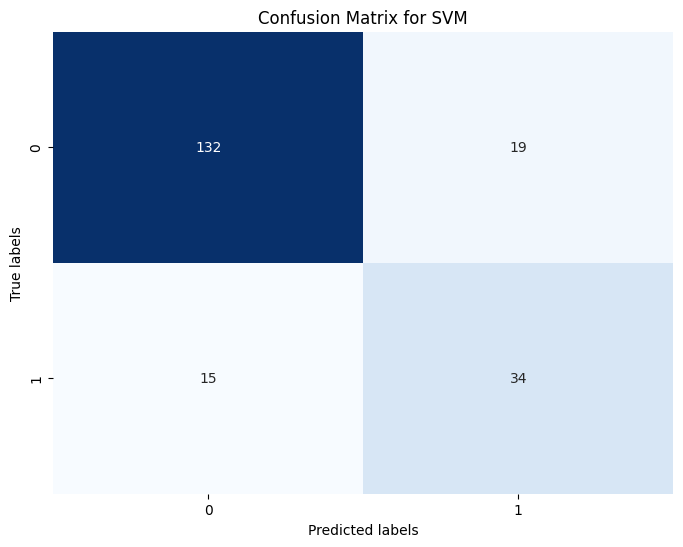

In [38]:
cm_svm = svm_model.plot_confusion_matrix()

PermutationExplainer explainer: 201it [01:53,  1.61it/s]


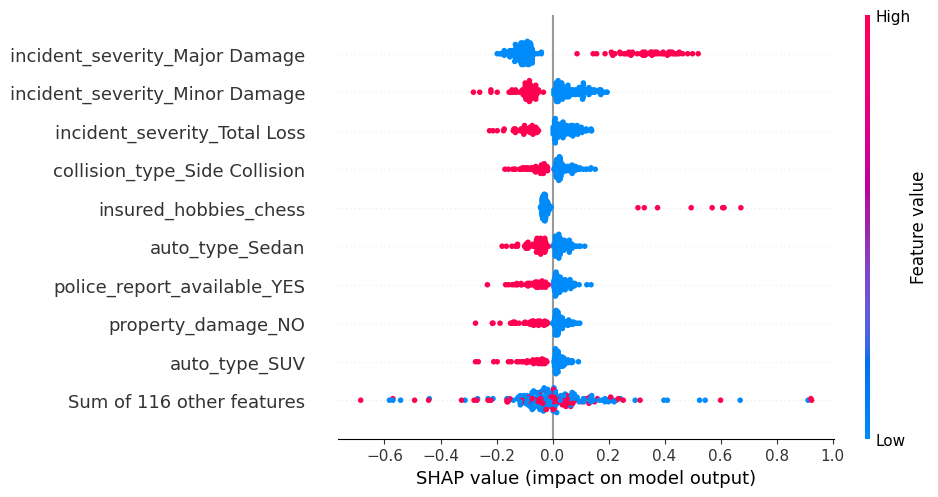

In [39]:
svm_model.shap_explanation()